<a href="https://colab.research.google.com/github/soumilhooda/MLDLNNtoCV/blob/main/Q1_NNFL_Assignment1_SoumilHooda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
import numpy.random as nr
from sklearn.metrics import matthews_corrcoef as cc


In [5]:
def cost_function_LR(X,y,w):
  hypothesis = np.dot(X,w.T)
  J = 1/(2*len(y))*np.sum((hypothesis-y)**2)
  return J

In [6]:
def cost_function_RR(X,y,w,lamb):
  hypothesis = np.dot(X,w.T)
  J = 1/(2*len(y))*np.sum((hypothesis-y)**2)+(lamb/2)*np.sum(w**2)
  return J

In [7]:
def cost_function_LAR(X,y,w,lamb):
  hypothesis = np.dot(X,w.T)
  J = 1/(2*len(y))*np.sum((hypothesis-y)**2)+(lamb/2)*np.sum(np.abs(w))
  return J

In [8]:
def batch_gd_LR(X,y,w,alpha,iters):
  cost_history = np.zeros(iters)
  for i in range(iters):
      hypothesis = np.dot(X,w.T)
      w = w - (alpha/len(y))*(np.dot((hypothesis-y).T,X))
      cost_history[i] = cost_function_LR(X,y,w)
  return w, cost_history

In [9]:
def batch_gd_RR(X,y,w,alpha,iters,lamb):
  cost_history = np.zeros(iters)
  for i in range(iters):
    hypothesis = np.dot(X,w.T)
    w = w*(1-(alpha*lamb)) - alpha/len(y)*(np.dot((hypothesis-y).T,X))
    cost_history[i] = cost_function_RR(X,y,w,lamb)
  return w, cost_history

In [10]:
def batch_gd_LAR(X,y,w,alpha,iters,lamb):
  cost_history = np.zeros(iters)
  for i in range(iters):
    hypothesis = np.dot(X,w.T)
    w = w - ((alpha*lamb)/2)*np.sign(w) - alpha/len(y)*(np.dot((hypothesis-y).T,X))
    cost_history[i] = cost_function_LAR(X,y,w,lamb)
  return w, cost_history

In [11]:
def MB_gd_LR(X,y,w,alpha,iters,batch_size):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = nr.randint(len(y)-batch_size)
    ind_x = X[rand_index:rand_index+batch_size]
    ind_y = y[rand_index:rand_index+batch_size,]
    w = w - alpha/batch_size * ((ind_x.T.dot(ind_x.dot(w.T)-ind_y)).T)
    cost_history[i] = cost_function_LR(ind_x,ind_y,w)
  return w, cost_history

In [12]:
def MB_gd_RR(X,y,w,alpha,iters,batch_size,lamb):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = nr.randint(len(y)-batch_size)
    ind_x = X[rand_index:rand_index+batch_size]
    ind_y = y[rand_index:rand_index+batch_size]
    w = w*(1-(alpha*lamb)) - alpha/batch_size * ((ind_x.T.dot(ind_x.dot(w.T)-ind_y)).T)
    cost_history[i] = cost_function_RR(ind_x,ind_y,w,lamb)
  return w, cost_history

In [13]:
def MB_gd_LAR(X,y,w,alpha,iters,batch_size,lamb):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = nr.randint(len(y)-batch_size)
    ind_x = X[rand_index:rand_index+batch_size]
    ind_y = y[rand_index:rand_index+batch_size]
    w = w - ((alpha*lamb)/2)*np.sign(w) - alpha/batch_size * ((ind_x.T.dot(ind_x.dot(w.T)-ind_y)).T)
    cost_history[i] = cost_function_LAR(ind_x,ind_y,w,lamb)
  return w, cost_history

In [14]:
def S_gd_LR(X,y,w,alpha,iters):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = nr.randint(len(y)-1)
    ind_x = X[rand_index:rand_index+1]
    ind_y = y[rand_index:rand_index+1]
    w = w - alpha * ((ind_x.T.dot(ind_x.dot(w.T)-ind_y)).T)
    cost_history[i] = cost_function_LR(ind_x,ind_y,w)
  return w, cost_history

In [15]:
def S_gd_RR(X,y,w,alpha,iters,lamb):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = nr.randint(len(y)-1)
    ind_x = X[rand_index:rand_index+1]
    ind_y = y[rand_index:rand_index+1]
    w = w*(1-(alpha*lamb)) - alpha * ((ind_x.T.dot(ind_x.dot(w.T)-ind_y)).T)
    cost_history[i] = cost_function_RR(ind_x,ind_y,w,lamb)
  return w, cost_history

In [16]:
def S_gd_LAR(X,y,w,alpha,iters,lamb):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = nr.randint(len(y)-1)
    ind_x = X[rand_index:rand_index+1]
    ind_y = y[rand_index:rand_index+1]
    w = w - ((alpha*lamb)/2)*np.sign(w) - alpha * ((ind_x.T.dot(ind_x.dot(w.T)-ind_y)).T)
    cost_history[i] = cost_function_LAR(ind_x,ind_y,w,lamb)
  return w, cost_history

In [17]:
def MeanSquareError(Ypred, Yte):
  mse = np.sum((np.square(Ypred - Yte)).mean(axis=0))
  return mse


In [18]:
def MeanAbsoluteError(Ypred, Yte):
  mae = np.sum(np.abs((Ypred-Yte)).mean(axis=0))
  return mae

In [42]:
def corr(Ypred, Yte):
  corrvalue = (np.sum(np.dot((Ypred-np.mean(Ypred,axis=0)).T,(Yte-np.mean(Yte,axis=0)))))/(np.std(Ypred,axis=0)*np.std(Yte,axis=0)*Yte.shape[0])
  return corrvalue

In [19]:
xtrdata = pd.read_csv('/content/drive/MyDrive/xtr.csv',header=None)
ytrdata = pd.read_csv('/content/drive/MyDrive/ytr.csv',header=None)
xtedata = pd.read_csv('/content/drive/MyDrive/xte.csv',header=None)
ytedata = pd.read_csv('/content/drive/MyDrive/yte.csv',header=None)
print(xtrdata)
print(ytrdata)
print(xtedata)
print(ytedata)

        0     1
0   17.40  7.14
1   17.40  8.98
2   17.40  8.64
3   17.40  6.94
4   17.40  8.68
5   17.40  7.02
6   17.40  8.52
7   17.40  8.70
8   17.40  7.26
9   17.40  8.72
10  17.40  8.64
11  17.84  9.14
12  18.28  8.12
13  16.91  7.62
14  16.47  8.66
15  17.40  9.16
16  17.84  9.68
17  18.27  8.16
18  16.47  7.64
19  17.39  8.70
20  17.82  9.20
21  18.27  9.68
22  16.94  8.20
23  16.47  7.72
24  17.40  8.68
25  17.81  9.16
26  18.25  9.68
27  16.92  8.18
28  16.47  7.68
29  17.40  8.62
30  17.86  9.14
31  18.30  9.63
32  16.92  8.12
33  16.43  7.63
34  17.40  8.62
35  17.85  9.13
36  18.28  9.62
37  16.94  8.14
38  16.46  7.64
39  17.40  9.30
40  17.40  8.98
41  17.40  8.60
42  17.40  8.62
43  17.40  8.60
44  17.40  8.62
45  17.40  8.56
46  17.88  9.06
47  18.32  9.56
48  16.96  8.06
49  16.48  7.56
50  17.40  8.56
51  17.85  9.06
52  18.29  9.56
53  16.93  8.06
54  16.46  7.56
       0
0   1.24
1   1.24
2   1.24
3   1.24
4   1.24
5   1.24
6   1.18
7   1.24
8   1.24
9   1.24
10  1

In [20]:
xtrdatan = xtrdata.values
Xtr = xtrdatan[:,[0,1]]
m = Xtr.shape[0]
xmintr = np.min(Xtr, axis=0)
xmaxtr = np.max(Xtr, axis=0)
Xtr = ((Xtr - xmintr)/(xmaxtr - xmintr))
print(Xtr)


[[0.51322751 0.0729927 ]
 [0.51322751 0.74452555]
 [0.51322751 0.62043796]
 [0.51322751 0.        ]
 [0.51322751 0.6350365 ]
 [0.51322751 0.02919708]
 [0.51322751 0.57664234]
 [0.51322751 0.64233577]
 [0.51322751 0.11678832]
 [0.51322751 0.64963504]
 [0.51322751 0.62043796]
 [0.74603175 0.80291971]
 [0.97883598 0.43065693]
 [0.25396825 0.24817518]
 [0.02116402 0.62773723]
 [0.51322751 0.81021898]
 [0.74603175 1.        ]
 [0.97354497 0.44525547]
 [0.02116402 0.25547445]
 [0.50793651 0.64233577]
 [0.73544974 0.82481752]
 [0.97354497 1.        ]
 [0.26984127 0.45985401]
 [0.02116402 0.28467153]
 [0.51322751 0.6350365 ]
 [0.73015873 0.81021898]
 [0.96296296 1.        ]
 [0.25925926 0.45255474]
 [0.02116402 0.27007299]
 [0.51322751 0.61313869]
 [0.75661376 0.80291971]
 [0.98941799 0.98175182]
 [0.25925926 0.43065693]
 [0.         0.25182482]
 [0.51322751 0.61313869]
 [0.75132275 0.79927007]
 [0.97883598 0.97810219]
 [0.26984127 0.4379562 ]
 [0.01587302 0.25547445]
 [0.51322751 0.86131387]


In [21]:
Ytr = ytrdata.values
m = Ytr.shape[0]
ymintr = np.min(Ytr, axis=0)
ymaxtr = np.max(Ytr, axis=0)
Ytr = ((Ytr - ymintr)/(ymaxtr - ymintr))
print(Ytr)

[[0.21428571]
 [0.21428571]
 [0.21428571]
 [0.21428571]
 [0.21428571]
 [0.21428571]
 [0.        ]
 [0.21428571]
 [0.21428571]
 [0.21428571]
 [0.21428571]
 [0.21428571]
 [0.21428571]
 [0.21428571]
 [0.42857143]
 [0.42857143]
 [0.42857143]
 [0.42857143]
 [0.42857143]
 [0.14285714]
 [0.14285714]
 [0.14285714]
 [0.14285714]
 [0.14285714]
 [0.21428571]
 [0.21428571]
 [0.21428571]
 [0.21428571]
 [0.21428571]
 [0.14285714]
 [0.14285714]
 [0.14285714]
 [0.14285714]
 [0.14285714]
 [0.42857143]
 [0.42857143]
 [0.42857143]
 [0.42857143]
 [0.42857143]
 [0.28571429]
 [0.78571429]
 [1.        ]
 [0.64285714]
 [0.64285714]
 [0.89285714]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [0.64285714]
 [0.64285714]
 [0.64285714]
 [0.64285714]
 [0.64285714]]


In [22]:
pp = np.ones([m,1])
Xtr = np.append(pp,Xtr,axis=1)
print(Xtr)

[[1.         0.51322751 0.0729927 ]
 [1.         0.51322751 0.74452555]
 [1.         0.51322751 0.62043796]
 [1.         0.51322751 0.        ]
 [1.         0.51322751 0.6350365 ]
 [1.         0.51322751 0.02919708]
 [1.         0.51322751 0.57664234]
 [1.         0.51322751 0.64233577]
 [1.         0.51322751 0.11678832]
 [1.         0.51322751 0.64963504]
 [1.         0.51322751 0.62043796]
 [1.         0.74603175 0.80291971]
 [1.         0.97883598 0.43065693]
 [1.         0.25396825 0.24817518]
 [1.         0.02116402 0.62773723]
 [1.         0.51322751 0.81021898]
 [1.         0.74603175 1.        ]
 [1.         0.97354497 0.44525547]
 [1.         0.02116402 0.25547445]
 [1.         0.50793651 0.64233577]
 [1.         0.73544974 0.82481752]
 [1.         0.97354497 1.        ]
 [1.         0.26984127 0.45985401]
 [1.         0.02116402 0.28467153]
 [1.         0.51322751 0.6350365 ]
 [1.         0.73015873 0.81021898]
 [1.         0.96296296 1.        ]
 [1.         0.25925926 0.45

In [23]:
xtedatan = xtedata.values
Xte = xtedatan[:,[0,1]]
n = Xte.shape[0]
xminte = np.min(Xte, axis=0)
xmaxte = np.max(Xte, axis=0)
Xte = ((Xte - xminte)/(xmaxte - xminte))
pp = np.ones([n,1])
Xte = np.append(pp,Xte,axis=1)
print(Xte)

[[1.         0.5212766  0.5       ]
 [1.         0.76595745 0.75      ]
 [1.         1.         1.        ]
 [1.         0.29255319 0.25      ]
 [1.         0.0212766  0.        ]
 [1.         0.5212766  0.5       ]
 [1.         0.7606383  0.75      ]
 [1.         1.         1.        ]
 [1.         0.25531915 0.25      ]
 [1.         0.         0.        ]]


In [24]:
Yte = ytedata.values
n = Yte.shape[0]
yminte = np.min(Yte, axis=0)
ymaxte = np.max(Yte, axis=0)
Yte = ((Yte - yminte)/(ymaxte - yminte))
print(Yte)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [25]:
w = np.zeros((1,Xtr.shape[1]))
print(w)
print(w.T.shape)

[[0. 0. 0.]]
(3, 1)


LR with BGD

In [31]:
def LR_BGD(alpha,iters):
  LR_batch_weight, LR_BGD_J = batch_gd_LR(Xtr,Ytr,w,alpha,iters)
  Ypred_LR_batchGD = np.dot(Xte,LR_batch_weight.T)
  plt.plot(range(iters),LR_BGD_J)
  plt.show()
  print("Mean Square Error is ",MeanSquareError(Ypred_LR_batchGD,Yte),"\n")
  print("Mean Absolute Error is ",MeanAbsoluteError(Ypred_LR_batchGD,Yte),"\n")
  print("Correlation Coefficient is ",corr(Ypred_LR_batchGD,Yte),"\n")
  

LR with MBGD

In [33]:
def LR_MBGD(alpha,iters,batch_size):
  LR_MBGD_weight, LR_MBGD_J = MB_gd_LR(Xtr,Ytr,w,alpha,iters,batch_size)
  Ypred_LR_MBGD = np.dot(Xte,LR_MBGD_weight.T)
  plt.plot(range(iters),LR_MBGD_J)
  plt.show()
  print("Mean Square Error is ",MeanSquareError(Ypred_LR_MBGD,Yte),"\n")
  print("Mean Absolute Error is ",MeanAbsoluteError(Ypred_LR_MBGD,Yte),"\n")
  print("Correlation Coefficient is ",corr(Ypred_LR_MBGD,Yte),"\n")

LR with Stochastic GD

In [32]:
def LR_SGD(alpha,n_epochs):
  LR_SGD_weight, LR_SGD_J = S_gd_LR(Xtr,Ytr,w,alpha,n_epochs)
  Ypred_LR_SGD = np.dot(Xte,LR_SGD_weight.T)
  plt.plot(range(n_epochs),LR_SGD_J)
  plt.show()
  print("Mean Square Error is ",MeanSquareError(Ypred_LR_SGD,Yte),"\n")
  print("Mean Absolute Error is ",MeanAbsoluteError(Ypred_LR_SGD,Yte),"\n")
  print("Correlation Coefficient is ",corr(Ypred_LR_SGD,Yte),"\n")


RR with BGD

In [34]:
def RR_BGD(alpha,iters,lamb):
  RR_batch_weight, RR_batch_J = batch_gd_RR(Xtr,Ytr,w,alpha,iters,lamb)
  Ypred_RR_batchGD = np.dot(Xte,RR_batch_weight.T)
  plt.plot(range(iters),RR_batch_J)
  plt.show()  
  print("Mean Square Error is ",MeanSquareError(Ypred_RR_batchGD,Yte),"\n")
  print("Mean Absolute Error is ",MeanAbsoluteError(Ypred_RR_batchGD,Yte),"\n")
  print("Correlation Coefficient is ",corr(Ypred_RR_batchGD,Yte),"\n")

RR with MBGD

In [35]:
def RR_MBGD(alpha,iters,batch_size,lamb):
  RR_MBGD_weight, RR_MBGD_J = MB_gd_RR(Xtr,Ytr,w,alpha,iters,batch_size,lamb)
  Ypred_RR_MBGD = np.dot(Xte,RR_MBGD_weight.T)
  plt.plot(range(iters),RR_MBGD_J)
  plt.show()
  print("Mean Square Error is ",MeanSquareError(Ypred_RR_MBGD,Yte),"\n")
  print("Mean Absolute Error is ",MeanAbsoluteError(Ypred_RR_MBGD,Yte),"\n")
  print("Correlation Coefficient is ",corr(Ypred_RR_MBGD,Yte),"\n")

RR with Stochastic GD

In [36]:
def RR_SGD(alpha,n_epochs,lamb):
  RR_SGD_weight, RR_SGD_J =  S_gd_RR(Xtr,Ytr,w,alpha,n_epochs,lamb)
  Ypred_RR_SGD = np.dot(Xte,RR_SGD_weight.T)
  plt.plot(range(n_epochs),RR_SGD_J)
  plt.show()
  print("Mean Square Error is ",MeanSquareError(Ypred_RR_SGD,Yte),"\n")
  print("Mean Absolute Error is ",MeanAbsoluteError(Ypred_RR_SGD,Yte),"\n")
  print("Correlation Coefficient is ",corr(Ypred_RR_SGD,Yte),"\n")

LAR with BGD

In [37]:
def LAR_BGD(alpha,iters,lamb):
  LAR_batch_weight, LAR_batch_J = batch_gd_LAR(Xtr,Ytr,w,alpha,iters,lamb)
  Ypred_LAR_batchGD = np.dot(Xte,LAR_batch_weight.T)
  plt.plot(range(iters),LAR_batch_J)
  plt.show()
  print("Mean Square Error is ",MeanSquareError(Ypred_LAR_batchGD,Yte),"\n")
  print("Mean Absolute Error is ",MeanAbsoluteError(Ypred_LAR_batchGD,Yte),"\n")
  print("Correlation Coefficient is ",corr(Ypred_LAR_batchGD,Yte),"\n")
  

LAR with MBGD

In [38]:
def LAR_MBGD(alpha,iters,batch_size,lamb):
  LAR_MBGD_weight, LAR_MBGD_J = MB_gd_LAR(Xtr,Ytr,w,alpha,iters,batch_size,lamb)
  Ypred_LAR_MBGD = np.dot(Xte,LAR_MBGD_weight.T)
  plt.plot(range(iters),LAR_MBGD_J)
  plt.show()
  print("Mean Square Error is ",MeanSquareError(Ypred_LAR_MBGD,Yte),"\n")
  print("Mean Absolute Error is ",MeanAbsoluteError(Ypred_LAR_MBGD,Yte),"\n")
  print("Correlation Coefficient is ",corr(Ypred_LAR_MBGD,Yte),"\n")

LAR with Stochastic GD

In [39]:
def LAR_SGD(alpha,n_epochs,lamb):
  LAR_SGD_weight, LAR_SGD_J =  S_gd_LAR(Xtr,Ytr,w,alpha,n_epochs,lamb)
  Ypred_LAR_SGD = np.dot(Xte,LAR_SGD_weight.T)
  plt.plot(range(n_epochs),LAR_SGD_J)
  plt.show()
  print("Mean Square Error is ",MeanSquareError(Ypred_LAR_SGD,Yte),"\n")
  print("Mean Absolute Error is ",MeanAbsoluteError(Ypred_LAR_SGD,Yte),"\n")
  print("Correlation Coefficient is ",corr(Ypred_LAR_SGD,Yte),"\n")

Let us implement GRID SEARCH to find optimal parameters.

In [40]:
alphaoptions = np.array([0.001,0.1,0.05])
lamboptions = np.array([0.3,0.5,0.01])
iterationsoptions = np.array([10000,12000,18000])




For alpha value  0.001 , lambda value  0.3 ,  10000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Linear Regression with Batch Gradient Descent. 



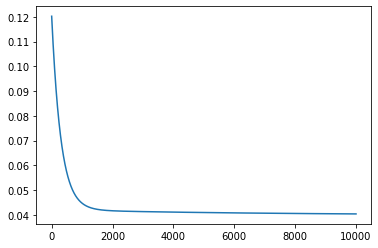

Mean Square Error is  0.26585526885538424 

Mean Absolute Error is  0.5001998486030287 

Correlation Coefficient is  [-0.00378112] 

For Linear Regression with Mini Batch Gradient Descent. 



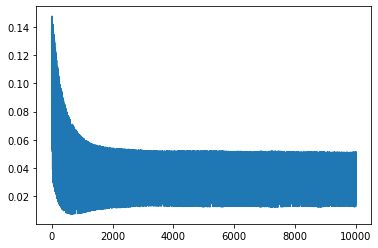

Mean Square Error is  0.27665392865462135 

Mean Absolute Error is  0.5002307680180618 

Correlation Coefficient is  [-0.00464912] 

For Linear Regression with Stochastic Gradient Descent. 



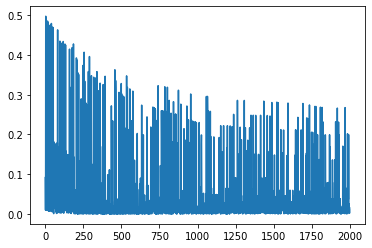

Mean Square Error is  0.2784633863484721 

Mean Absolute Error is  0.500649730648285 

Correlation Coefficient is  [-0.00793318] 

For Ridge Regression with Batch Gradient Descent. 



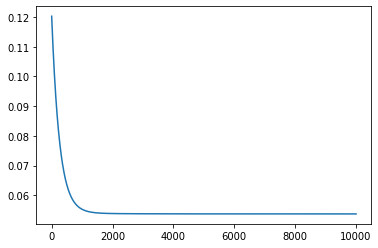

Mean Square Error is  0.2860995293111178 

Mean Absolute Error is  0.5004797678412998 

Correlation Coefficient is  [-0.00725234] 

For Ridge Regression with Mini Batch Gradient Descent. 



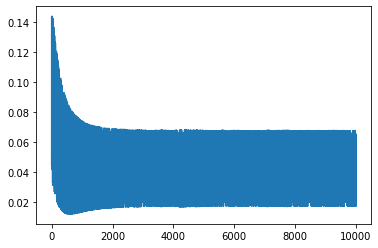

Mean Square Error is  0.29865883212971933 

Mean Absolute Error is  0.5004444450881358 

Correlation Coefficient is  [-0.00731867] 

For Ridge Regression with Stochastic Gradient Descent. 



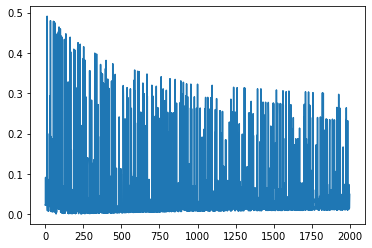

Mean Square Error is  0.28818608331704787 

Mean Absolute Error is  0.5005957378552035 

Correlation Coefficient is  [-0.00806016] 

For Least Angle Regression with Batch Gradient Descent. 



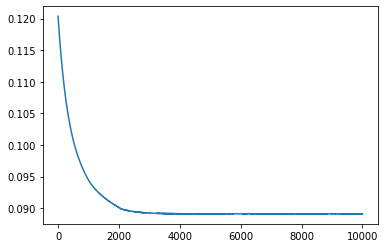

Mean Square Error is  0.312157942497118 

Mean Absolute Error is  0.5000005651844882 

Correlation Coefficient is  [-0.0056237] 

For Least Angle Regression with Mini Batch Gradient Descent. 



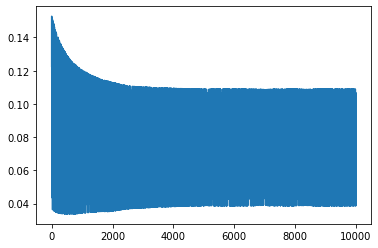

Mean Square Error is  0.3338154965458923 

Mean Absolute Error is  0.5000003155122229 

Correlation Coefficient is  [-0.00602933] 

For Least Angle Regression with Stochastic Gradient Descent. 



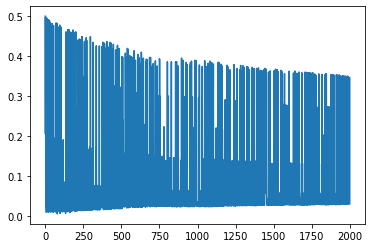

Mean Square Error is  0.33712666452108364 

Mean Absolute Error is  0.5000077707296328 

Correlation Coefficient is  [-0.00720054] 

For alpha value  0.001 , lambda value  0.3 ,  12000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Linear Regression with Batch Gradient Descent. 



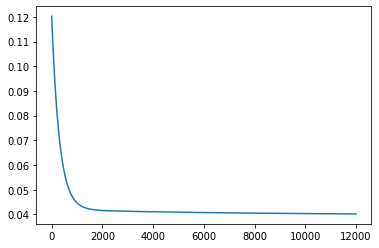

Mean Square Error is  0.265026341376332 

Mean Absolute Error is  0.500114302649814 

Correlation Coefficient is  [-0.00241066] 

For Linear Regression with Mini Batch Gradient Descent. 



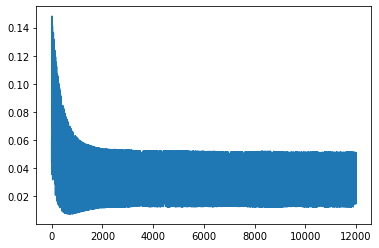

Mean Square Error is  0.2757234296730987 

Mean Absolute Error is  0.500169451081561 

Correlation Coefficient is  [-0.00373074] 

For Linear Regression with Stochastic Gradient Descent. 



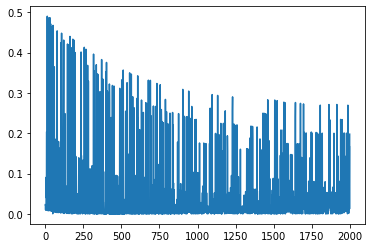

Mean Square Error is  0.2783949009742498 

Mean Absolute Error is  0.5006873714694968 

Correlation Coefficient is  [-0.00808045] 

For Ridge Regression with Batch Gradient Descent. 



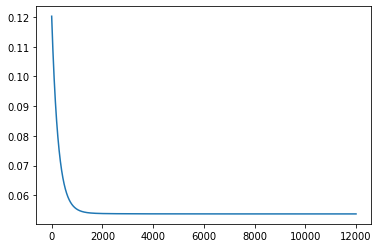

Mean Square Error is  0.28605749178422196 

Mean Absolute Error is  0.5004765466221233 

Correlation Coefficient is  [-0.00722606] 

For Ridge Regression with Mini Batch Gradient Descent. 



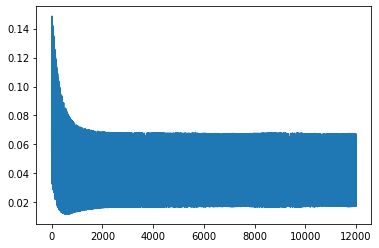

Mean Square Error is  0.2979143698273002 

Mean Absolute Error is  0.5004456747241781 

Correlation Coefficient is  [-0.00730777] 

For Ridge Regression with Stochastic Gradient Descent. 



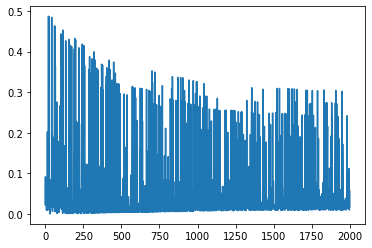

Mean Square Error is  0.2936136570041997 

Mean Absolute Error is  0.5005617688122974 

Correlation Coefficient is  [-0.00800871] 

For Least Angle Regression with Batch Gradient Descent. 



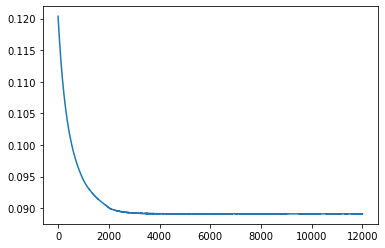

Mean Square Error is  0.3121899506032021 

Mean Absolute Error is  0.5000006769916628 

Correlation Coefficient is  [-0.0146796] 

For Least Angle Regression with Mini Batch Gradient Descent. 



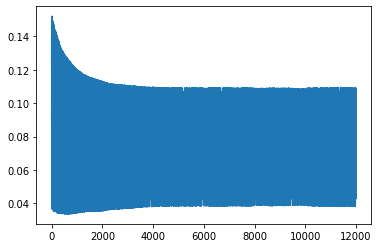

Mean Square Error is  0.33531617429284105 

Mean Absolute Error is  0.5000011542475542 

Correlation Coefficient is  [-0.01312095] 

For Least Angle Regression with Stochastic Gradient Descent. 



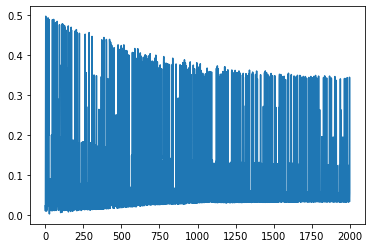

Mean Square Error is  0.33337278074876686 

Mean Absolute Error is  0.4999994253227225 

Correlation Coefficient is  [0.00015906] 

For alpha value  0.001 , lambda value  0.3 ,  18000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Linear Regression with Batch Gradient Descent. 



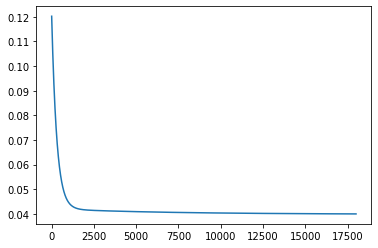

Mean Square Error is  0.2634551251945568 

Mean Absolute Error is  0.49991302649648783 

Correlation Coefficient is  [0.00244512] 

For Linear Regression with Mini Batch Gradient Descent. 



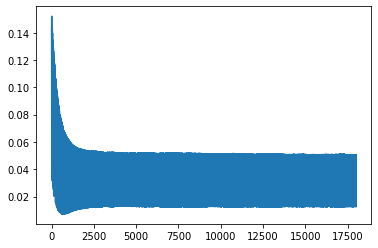

Mean Square Error is  0.27391786521644124 

Mean Absolute Error is  0.5000252513015411 

Correlation Coefficient is  [-0.0007118] 

For Linear Regression with Stochastic Gradient Descent. 



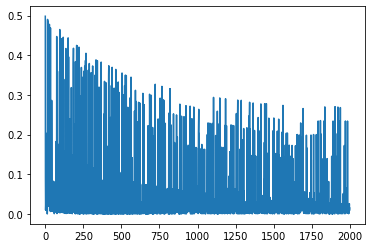

Mean Square Error is  0.27954260613621185 

Mean Absolute Error is  0.5006513088790403 

Correlation Coefficient is  [-0.00796316] 

For Ridge Regression with Batch Gradient Descent. 



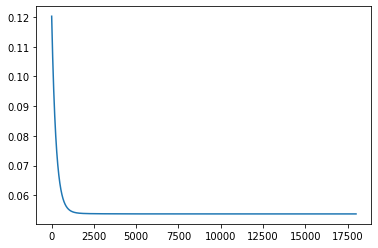

Mean Square Error is  0.28602513445623134 

Mean Absolute Error is  0.5004738641086985 

Correlation Coefficient is  [-0.00720293] 

For Ridge Regression with Mini Batch Gradient Descent. 



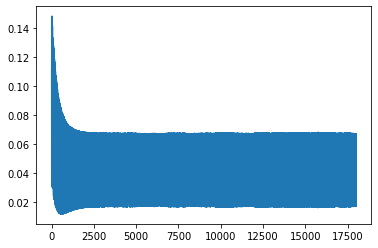

Mean Square Error is  0.29766473456571785 

Mean Absolute Error is  0.5004464732693086 

Correlation Coefficient is  [-0.00729843] 

For Ridge Regression with Stochastic Gradient Descent. 



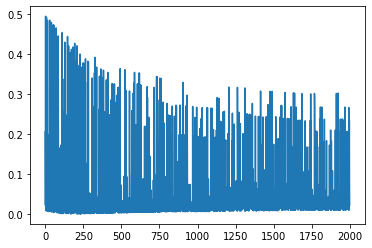

Mean Square Error is  0.2898757639290697 

Mean Absolute Error is  0.5006066407438652 

Correlation Coefficient is  [-0.00806888] 

For Least Angle Regression with Batch Gradient Descent. 



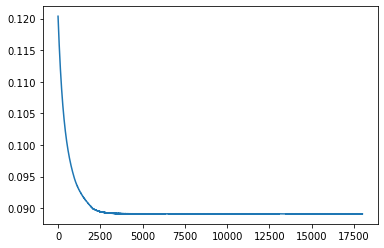

Mean Square Error is  0.31216411369976677 

Mean Absolute Error is  0.5000008946034225 

Correlation Coefficient is  [-0.01100963] 

For Least Angle Regression with Mini Batch Gradient Descent. 



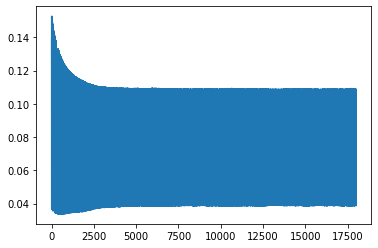

Mean Square Error is  0.3331785871629632 

Mean Absolute Error is  0.5000004944026414 

Correlation Coefficient is  [-0.00397431] 

For Least Angle Regression with Stochastic Gradient Descent. 



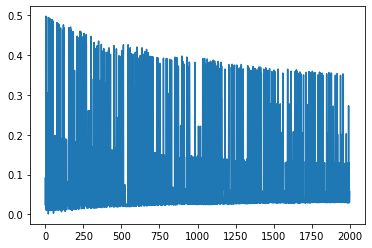

Mean Square Error is  0.3436692820508994 

Mean Absolute Error is  0.5000008936619352 

Correlation Coefficient is  [-0.00074082] 

For alpha value  0.001 , lambda value  0.5 ,  10000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Linear Regression with Batch Gradient Descent. 



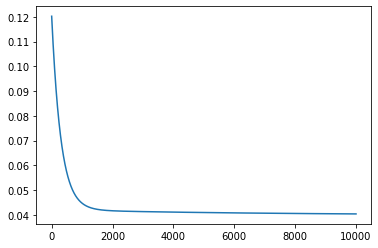

Mean Square Error is  0.26585526885538424 

Mean Absolute Error is  0.5001998486030287 

Correlation Coefficient is  [-0.00378112] 

For Linear Regression with Mini Batch Gradient Descent. 



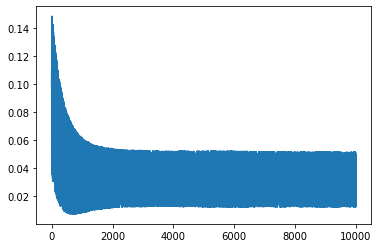

Mean Square Error is  0.2774794789562717 

Mean Absolute Error is  0.5002255446000452 

Correlation Coefficient is  [-0.00459159] 

For Linear Regression with Stochastic Gradient Descent. 



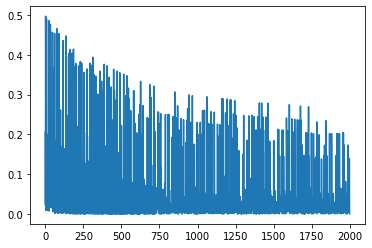

Mean Square Error is  0.2797243469538241 

Mean Absolute Error is  0.500644329144176 

Correlation Coefficient is  [-0.00798097] 

For Ridge Regression with Batch Gradient Descent. 



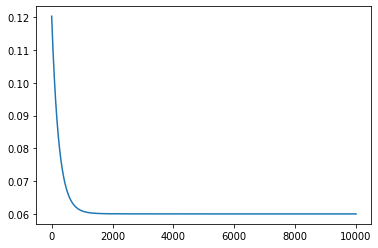

Mean Square Error is  0.2976939658520652 

Mean Absolute Error is  0.5004926239096408 

Correlation Coefficient is  [-0.00769132] 

For Ridge Regression with Mini Batch Gradient Descent. 



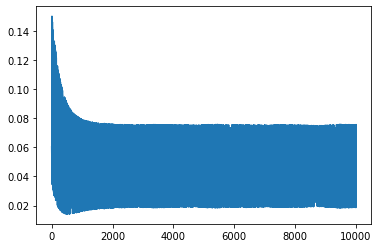

Mean Square Error is  0.3116758844162478 

Mean Absolute Error is  0.5004463201486153 

Correlation Coefficient is  [-0.00767292] 

For Ridge Regression with Stochastic Gradient Descent. 



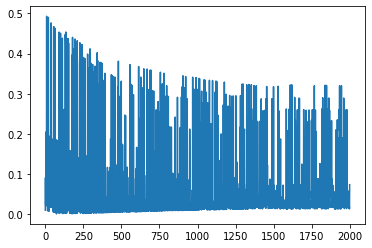

Mean Square Error is  0.3005078963745438 

Mean Absolute Error is  0.50053003946426 

Correlation Coefficient is  [-0.00800297] 

For Least Angle Regression with Batch Gradient Descent. 



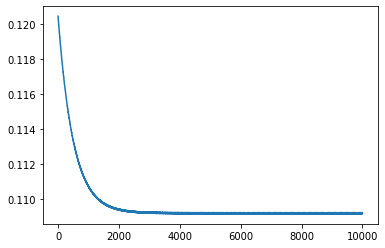

Mean Square Error is  0.37212145149995596 

Mean Absolute Error is  0.5000011221860797 

Correlation Coefficient is  [-0.03233409] 

For Least Angle Regression with Mini Batch Gradient Descent. 



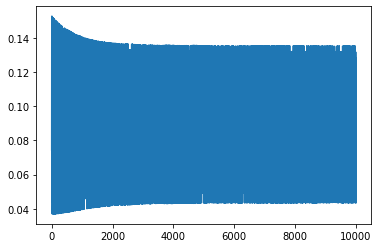

Mean Square Error is  0.40051147888371164 

Mean Absolute Error is  0.5000017862354896 

Correlation Coefficient is  [-0.0081703] 

For Least Angle Regression with Stochastic Gradient Descent. 



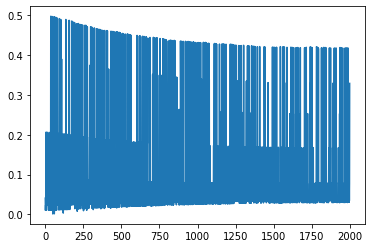

Mean Square Error is  0.3942753180960474 

Mean Absolute Error is  0.5000020290734528 

Correlation Coefficient is  [-0.01045952] 

For alpha value  0.001 , lambda value  0.5 ,  12000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Linear Regression with Batch Gradient Descent. 



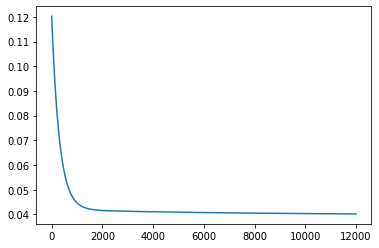

Mean Square Error is  0.265026341376332 

Mean Absolute Error is  0.500114302649814 

Correlation Coefficient is  [-0.00241066] 

For Linear Regression with Mini Batch Gradient Descent. 



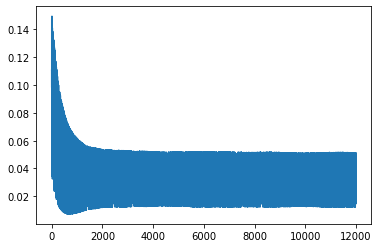

Mean Square Error is  0.27625010213381396 

Mean Absolute Error is  0.500165266730669 

Correlation Coefficient is  [-0.0036765] 

For Linear Regression with Stochastic Gradient Descent. 



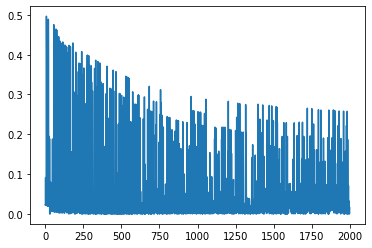

Mean Square Error is  0.2741442542583026 

Mean Absolute Error is  0.500699123293673 

Correlation Coefficient is  [-0.00799207] 

For Ridge Regression with Batch Gradient Descent. 



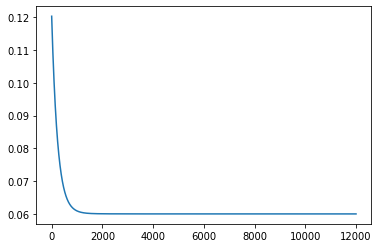

Mean Square Error is  0.2976890219630737 

Mean Absolute Error is  0.5004922562844374 

Correlation Coefficient is  [-0.0076884] 

For Ridge Regression with Mini Batch Gradient Descent. 



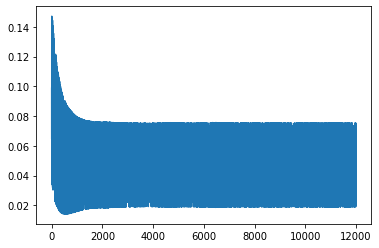

Mean Square Error is  0.3102217244094981 

Mean Absolute Error is  0.5004538177503718 

Correlation Coefficient is  [-0.00768182] 

For Ridge Regression with Stochastic Gradient Descent. 



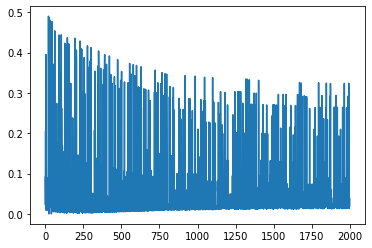

Mean Square Error is  0.3031535348889352 

Mean Absolute Error is  0.5005489458890442 

Correlation Coefficient is  [-0.00820459] 

For Least Angle Regression with Batch Gradient Descent. 



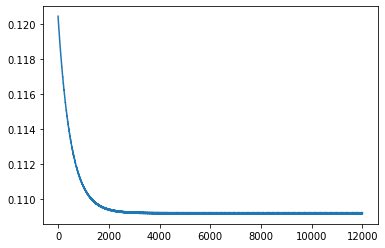

Mean Square Error is  0.37191804571953513 

Mean Absolute Error is  0.5000018750067772 

Correlation Coefficient is  [-0.00796368] 

For Least Angle Regression with Mini Batch Gradient Descent. 



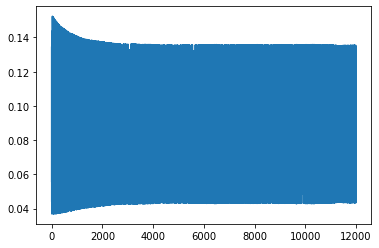

Mean Square Error is  0.4013161378762427 

Mean Absolute Error is  0.4999997090445533 

Correlation Coefficient is  [0.01209146] 

For Least Angle Regression with Stochastic Gradient Descent. 



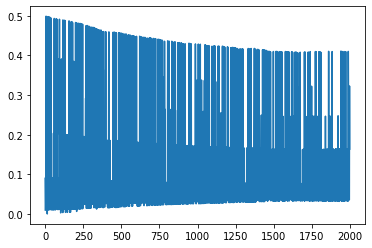

Mean Square Error is  0.38565127442056124 

Mean Absolute Error is  0.5000037660484884 

Correlation Coefficient is  [-0.00837697] 

For alpha value  0.001 , lambda value  0.5 ,  18000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Linear Regression with Batch Gradient Descent. 



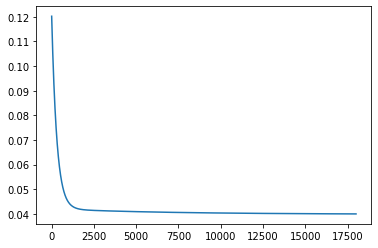

Mean Square Error is  0.2634551251945568 

Mean Absolute Error is  0.49991302649648783 

Correlation Coefficient is  [0.00244512] 

For Linear Regression with Mini Batch Gradient Descent. 



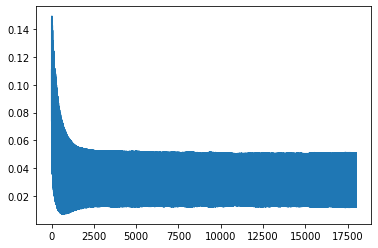

Mean Square Error is  0.27533356960435285 

Mean Absolute Error is  0.5000135461120918 

Correlation Coefficient is  [-0.00039742] 

For Linear Regression with Stochastic Gradient Descent. 



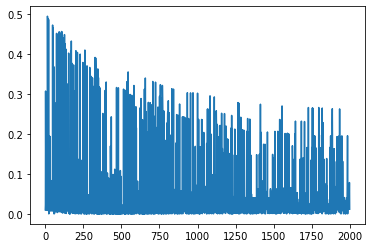

Mean Square Error is  0.27752868904601885 

Mean Absolute Error is  0.5006635916660054 

Correlation Coefficient is  [-0.00800506] 

For Ridge Regression with Batch Gradient Descent. 



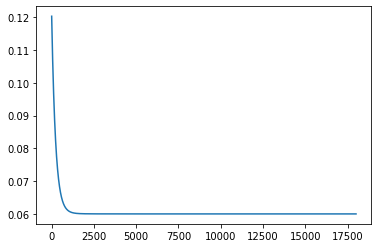

Mean Square Error is  0.2976868827441376 

Mean Absolute Error is  0.5004920856951465 

Correlation Coefficient is  [-0.00768697] 

For Ridge Regression with Mini Batch Gradient Descent. 



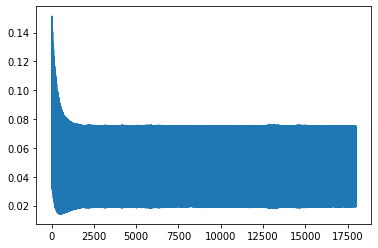

Mean Square Error is  0.3099207684198929 

Mean Absolute Error is  0.500453239780503 

Correlation Coefficient is  [-0.00767471] 

For Ridge Regression with Stochastic Gradient Descent. 



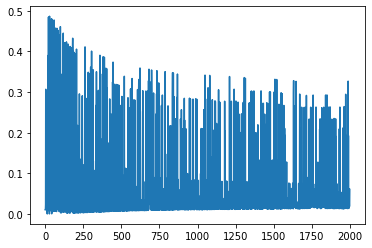

Mean Square Error is  0.3038444077563052 

Mean Absolute Error is  0.500562701868903 

Correlation Coefficient is  [-0.00820475] 

For Least Angle Regression with Batch Gradient Descent. 



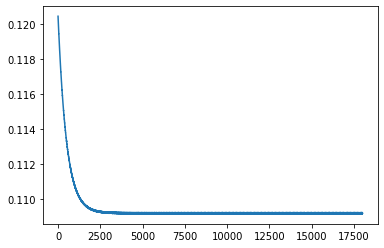

Mean Square Error is  0.37202741548769647 

Mean Absolute Error is  0.5000008818876475 

Correlation Coefficient is  [-0.00700464] 

For Least Angle Regression with Mini Batch Gradient Descent. 



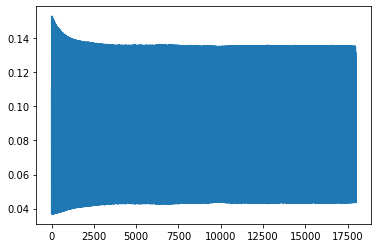

Mean Square Error is  0.400068968526824 

Mean Absolute Error is  0.5000004697779664 

Correlation Coefficient is  [-0.02123939] 

For Least Angle Regression with Stochastic Gradient Descent. 



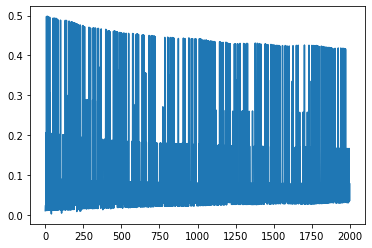

Mean Square Error is  0.3938864002147005 

Mean Absolute Error is  0.5000036081035557 

Correlation Coefficient is  [-0.00860758] 

For alpha value  0.001 , lambda value  0.01 ,  10000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Linear Regression with Batch Gradient Descent. 



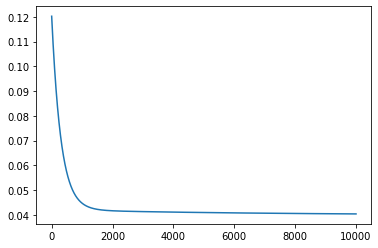

Mean Square Error is  0.26585526885538424 

Mean Absolute Error is  0.5001998486030287 

Correlation Coefficient is  [-0.00378112] 

For Linear Regression with Mini Batch Gradient Descent. 



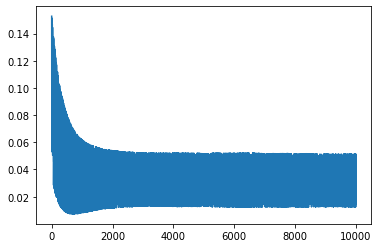

Mean Square Error is  0.2768340066234925 

Mean Absolute Error is  0.5002299217006473 

Correlation Coefficient is  [-0.00463836] 

For Linear Regression with Stochastic Gradient Descent. 



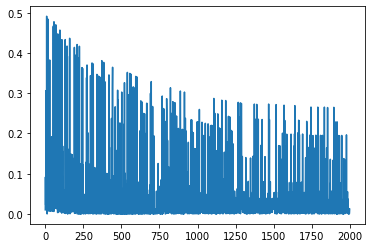

Mean Square Error is  0.2772653942257589 

Mean Absolute Error is  0.5006803679363122 

Correlation Coefficient is  [-0.00802097] 

For Ridge Regression with Batch Gradient Descent. 



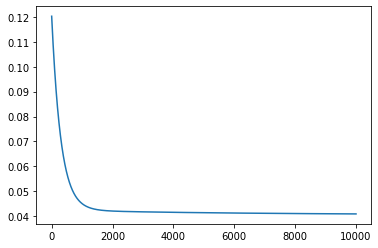

Mean Square Error is  0.2666197932048132 

Mean Absolute Error is  0.5002225619487308 

Correlation Coefficient is  [-0.00410847] 

For Ridge Regression with Mini Batch Gradient Descent. 



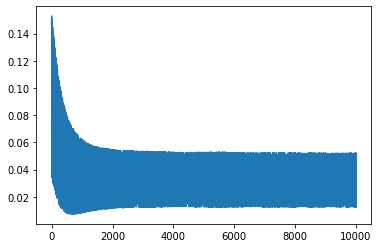

Mean Square Error is  0.27805615344423695 

Mean Absolute Error is  0.5002438895426231 

Correlation Coefficient is  [-0.00484405] 

For Ridge Regression with Stochastic Gradient Descent. 



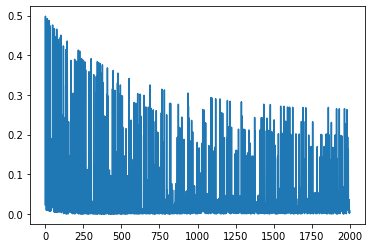

Mean Square Error is  0.27631973752277605 

Mean Absolute Error is  0.5006744140737397 

Correlation Coefficient is  [-0.00803906] 

For Least Angle Regression with Batch Gradient Descent. 



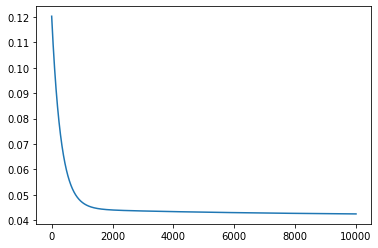

Mean Square Error is  0.26618693510337393 

Mean Absolute Error is  0.5001239348594637 

Correlation Coefficient is  [-0.00273128] 

For Least Angle Regression with Mini Batch Gradient Descent. 



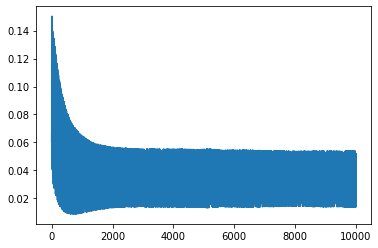

Mean Square Error is  0.2775529172897136 

Mean Absolute Error is  0.5001562943110317 

Correlation Coefficient is  [-0.0036741] 

For Least Angle Regression with Stochastic Gradient Descent. 



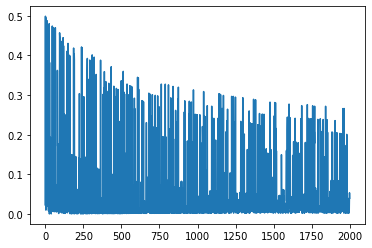

Mean Square Error is  0.2780890044482581 

Mean Absolute Error is  0.5006291498893483 

Correlation Coefficient is  [-0.00796425] 

For alpha value  0.001 , lambda value  0.01 ,  12000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Linear Regression with Batch Gradient Descent. 



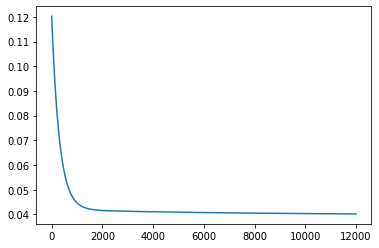

Mean Square Error is  0.265026341376332 

Mean Absolute Error is  0.500114302649814 

Correlation Coefficient is  [-0.00241066] 

For Linear Regression with Mini Batch Gradient Descent. 



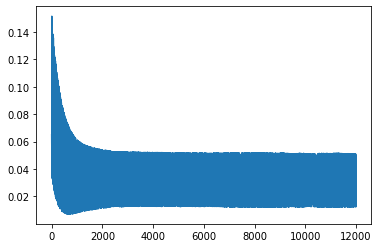

Mean Square Error is  0.27567918686323184 

Mean Absolute Error is  0.5001681947793942 

Correlation Coefficient is  [-0.00371247] 

For Linear Regression with Stochastic Gradient Descent. 



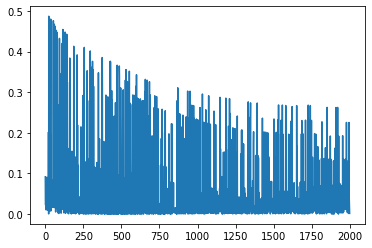

Mean Square Error is  0.2761980080939416 

Mean Absolute Error is  0.500679114905427 

Correlation Coefficient is  [-0.00798478] 

For Ridge Regression with Batch Gradient Descent. 



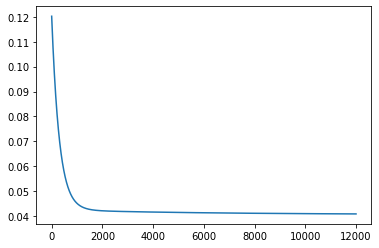

Mean Square Error is  0.26585720469005675 

Mean Absolute Error is  0.5001459096662477 

Correlation Coefficient is  [-0.00295977] 

For Ridge Regression with Mini Batch Gradient Descent. 



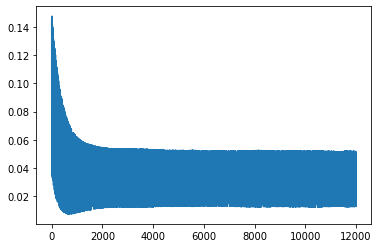

Mean Square Error is  0.27672733637513497 

Mean Absolute Error is  0.500191436532055 

Correlation Coefficient is  [-0.00409116] 

For Ridge Regression with Stochastic Gradient Descent. 



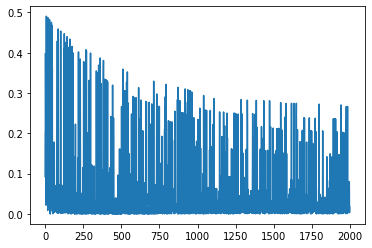

Mean Square Error is  0.27851632569801776 

Mean Absolute Error is  0.500642301742463 

Correlation Coefficient is  [-0.00789324] 

For Least Angle Regression with Batch Gradient Descent. 



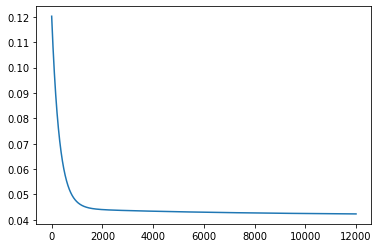

Mean Square Error is  0.2653297189351036 

Mean Absolute Error is  0.5000309112121467 

Correlation Coefficient is  [-0.00078803] 

For Least Angle Regression with Mini Batch Gradient Descent. 



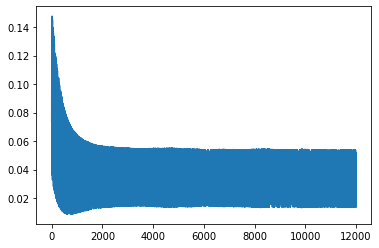

Mean Square Error is  0.2768843620895144 

Mean Absolute Error is  0.5000850354061422 

Correlation Coefficient is  [-0.00228543] 

For Least Angle Regression with Stochastic Gradient Descent. 



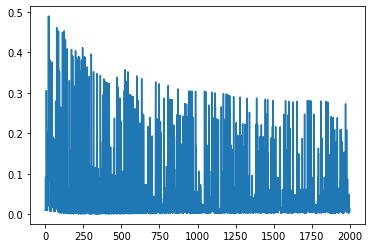

Mean Square Error is  0.2812688568681111 

Mean Absolute Error is  0.5005949819894976 

Correlation Coefficient is  [-0.00778098] 

For alpha value  0.001 , lambda value  0.01 ,  18000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Linear Regression with Batch Gradient Descent. 



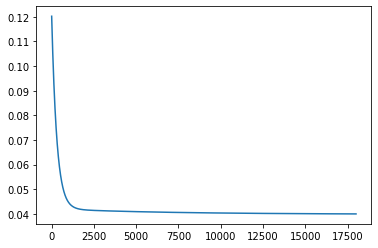

Mean Square Error is  0.2634551251945568 

Mean Absolute Error is  0.49991302649648783 

Correlation Coefficient is  [0.00244512] 

For Linear Regression with Mini Batch Gradient Descent. 



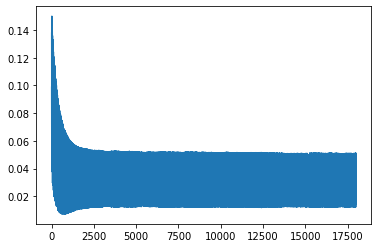

Mean Square Error is  0.27503483831949793 

Mean Absolute Error is  0.5000150939836148 

Correlation Coefficient is  [-0.00043742] 

For Linear Regression with Stochastic Gradient Descent. 



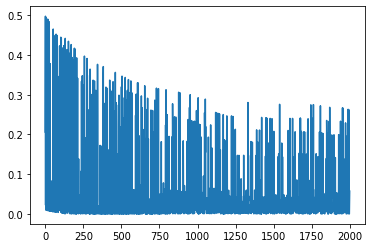

Mean Square Error is  0.27623244417188475 

Mean Absolute Error is  0.5006773697003875 

Correlation Coefficient is  [-0.0079504] 

For Ridge Regression with Batch Gradient Descent. 



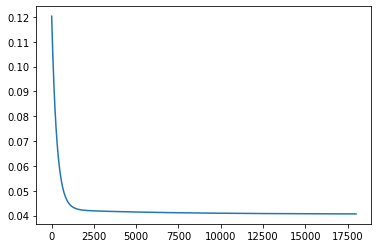

Mean Square Error is  0.2644375456924623 

Mean Absolute Error is  0.49997232846360307 

Correlation Coefficient is  [0.00070816] 

For Ridge Regression with Mini Batch Gradient Descent. 



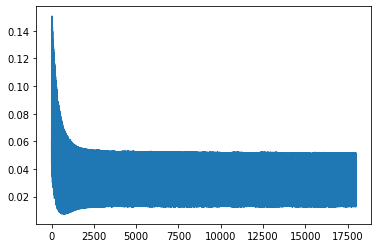

Mean Square Error is  0.27538049746732407 

Mean Absolute Error is  0.5000655868903168 

Correlation Coefficient is  [-0.00172414] 

For Ridge Regression with Stochastic Gradient Descent. 



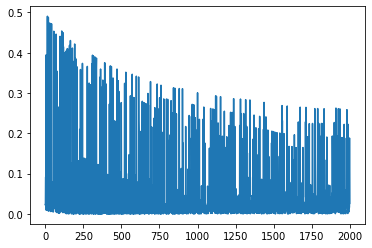

Mean Square Error is  0.27416244159804043 

Mean Absolute Error is  0.5006966783473842 

Correlation Coefficient is  [-0.00798907] 

For Least Angle Regression with Batch Gradient Descent. 



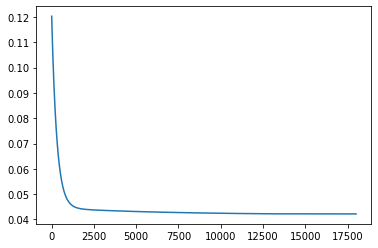

Mean Square Error is  0.26387297133999627 

Mean Absolute Error is  0.49999998108377497 

Correlation Coefficient is  [5.70083142e-07] 

For Least Angle Regression with Mini Batch Gradient Descent. 



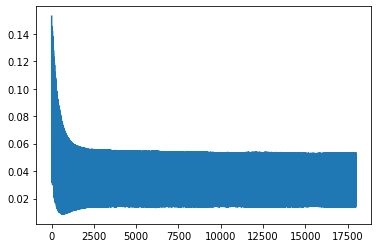

Mean Square Error is  0.2752022728020309 

Mean Absolute Error is  0.500000191842741 

Correlation Coefficient is  [-6.70719259e-06] 

For Least Angle Regression with Stochastic Gradient Descent. 



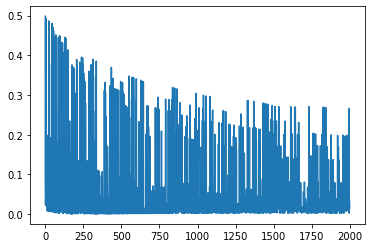

Mean Square Error is  0.27716325829719446 

Mean Absolute Error is  0.5006596947456178 

Correlation Coefficient is  [-0.00793898] 

For alpha value  0.1 , lambda value  0.3 ,  10000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Linear Regression with Batch Gradient Descent. 



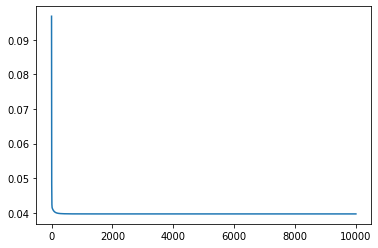

Mean Square Error is  0.2624152611977102 

Mean Absolute Error is  0.49926004135303065 

Correlation Coefficient is  [0.03755827] 

For Linear Regression with Mini Batch Gradient Descent. 



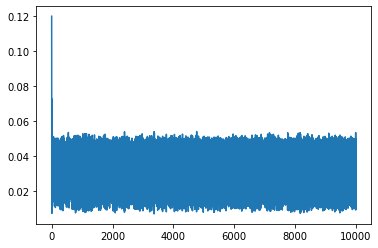

Mean Square Error is  0.27279514830771867 

Mean Absolute Error is  0.49966070534643503 

Correlation Coefficient is  [0.01606562] 

For Linear Regression with Stochastic Gradient Descent. 



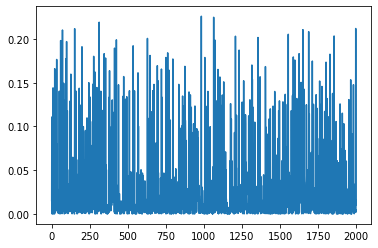

Mean Square Error is  0.27495695343043186 

Mean Absolute Error is  0.4997158828111961 

Correlation Coefficient is  [0.00412751] 

For Ridge Regression with Batch Gradient Descent. 



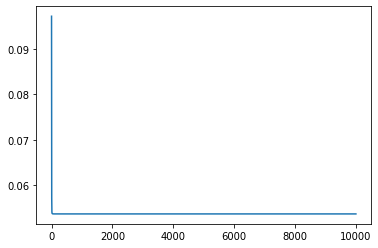

Mean Square Error is  0.28602170117911163 

Mean Absolute Error is  0.50047351189282 

Correlation Coefficient is  [-0.00719954] 

For Ridge Regression with Mini Batch Gradient Descent. 



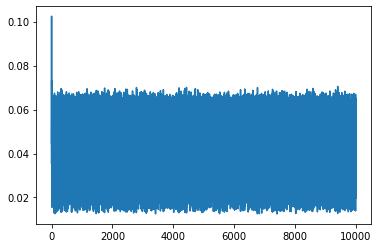

Mean Square Error is  0.29862673207215773 

Mean Absolute Error is  0.5004395452878159 

Correlation Coefficient is  [-0.00726708] 

For Ridge Regression with Stochastic Gradient Descent. 



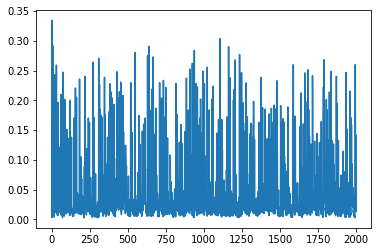

Mean Square Error is  0.2728578981590406 

Mean Absolute Error is  0.5005577990775874 

Correlation Coefficient is  [-0.00706648] 

For Least Angle Regression with Batch Gradient Descent. 



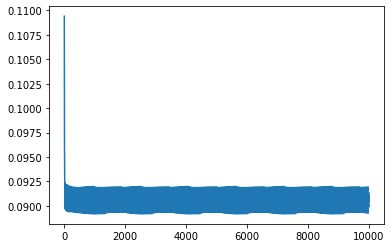

Mean Square Error is  0.31666454494606766 

Mean Absolute Error is  0.5000080936326065 

Correlation Coefficient is  [-0.01355583] 

For Least Angle Regression with Mini Batch Gradient Descent. 



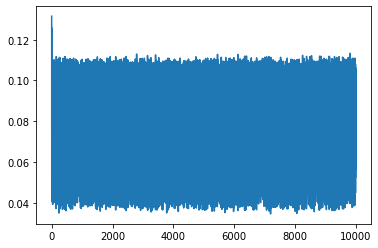

Mean Square Error is  0.32264008614178785 

Mean Absolute Error is  0.49998529965859684 

Correlation Coefficient is  [0.00654498] 

For Least Angle Regression with Stochastic Gradient Descent. 



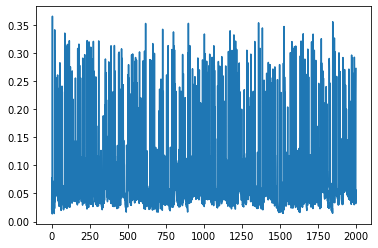

Mean Square Error is  0.26987430895812353 

Mean Absolute Error is  0.5001764138752436 

Correlation Coefficient is  [-0.00529065] 

For alpha value  0.1 , lambda value  0.3 ,  12000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Linear Regression with Batch Gradient Descent. 



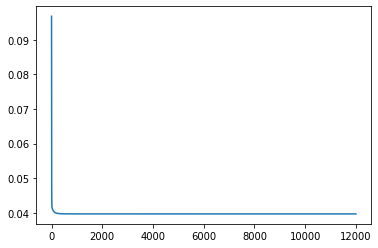

Mean Square Error is  0.2624152611977985 

Mean Absolute Error is  0.49926004135300106 

Correlation Coefficient is  [0.03755827] 

For Linear Regression with Mini Batch Gradient Descent. 



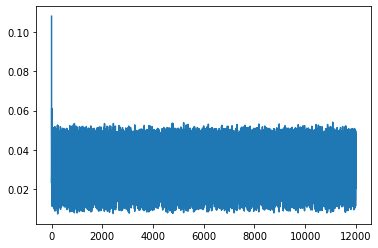

Mean Square Error is  0.27057479480422036 

Mean Absolute Error is  0.49968361000440853 

Correlation Coefficient is  [0.01448193] 

For Linear Regression with Stochastic Gradient Descent. 



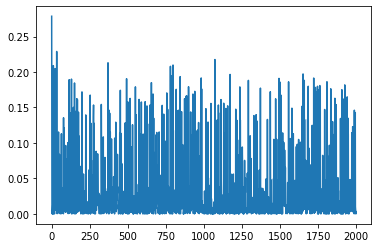

Mean Square Error is  0.25022400893983654 

Mean Absolute Error is  0.4991840775579858 

Correlation Coefficient is  [0.03586751] 

For Ridge Regression with Batch Gradient Descent. 



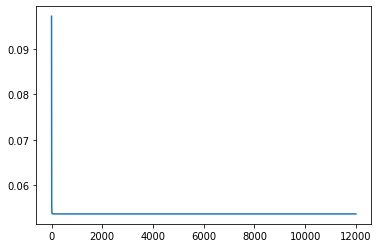

Mean Square Error is  0.28602170117911163 

Mean Absolute Error is  0.50047351189282 

Correlation Coefficient is  [-0.00719954] 

For Ridge Regression with Mini Batch Gradient Descent. 



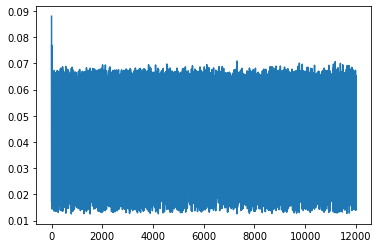

Mean Square Error is  0.3068884068907126 

Mean Absolute Error is  0.5004001607629491 

Correlation Coefficient is  [-0.00719335] 

For Ridge Regression with Stochastic Gradient Descent. 



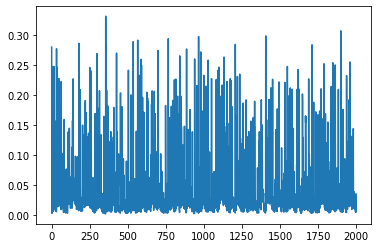

Mean Square Error is  0.3309500959710328 

Mean Absolute Error is  0.5002834798497846 

Correlation Coefficient is  [-0.00668389] 

For Least Angle Regression with Batch Gradient Descent. 



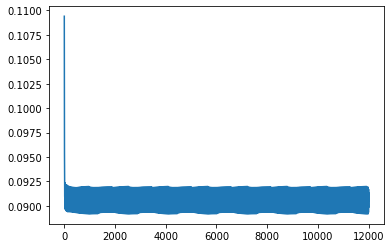

Mean Square Error is  0.31535766284729144 

Mean Absolute Error is  0.5000053287996715 

Correlation Coefficient is  [-0.00321524] 

For Least Angle Regression with Mini Batch Gradient Descent. 



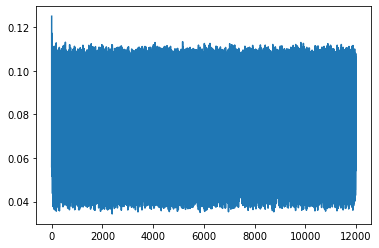

Mean Square Error is  0.3263585873963216 

Mean Absolute Error is  0.5000638133229313 

Correlation Coefficient is  [-0.0069468] 

For Least Angle Regression with Stochastic Gradient Descent. 



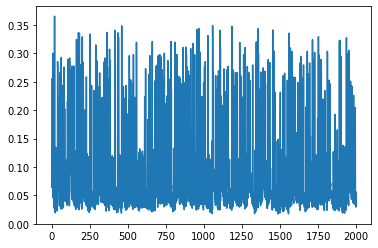

Mean Square Error is  0.32612559711354844 

Mean Absolute Error is  0.500224503096834 

Correlation Coefficient is  [-0.01084401] 

For alpha value  0.1 , lambda value  0.3 ,  18000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Linear Regression with Batch Gradient Descent. 



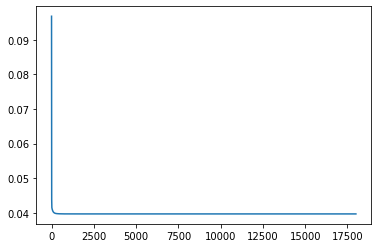

Mean Square Error is  0.2624152611977991 

Mean Absolute Error is  0.4992600413530008 

Correlation Coefficient is  [0.03755827] 

For Linear Regression with Mini Batch Gradient Descent. 



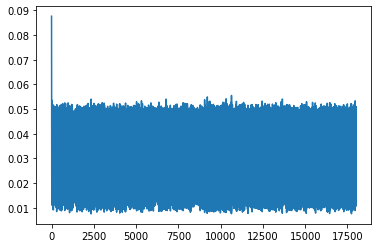

Mean Square Error is  0.2706564804027992 

Mean Absolute Error is  0.4996762493315746 

Correlation Coefficient is  [0.01333357] 

For Linear Regression with Stochastic Gradient Descent. 



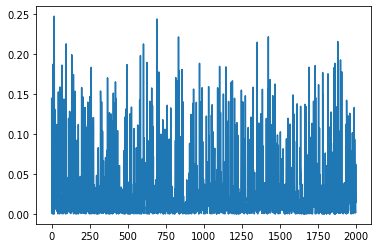

Mean Square Error is  0.27964575794285296 

Mean Absolute Error is  0.4991959277844408 

Correlation Coefficient is  [0.07524078] 

For Ridge Regression with Batch Gradient Descent. 



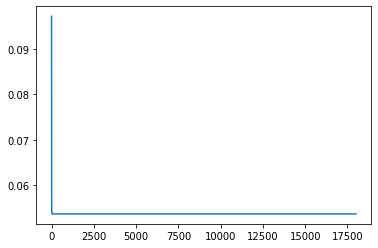

Mean Square Error is  0.28602170117911163 

Mean Absolute Error is  0.50047351189282 

Correlation Coefficient is  [-0.00719954] 

For Ridge Regression with Mini Batch Gradient Descent. 



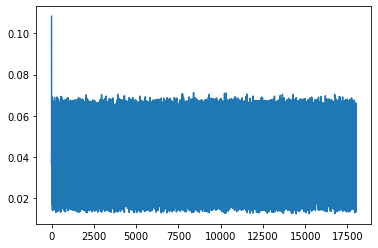

Mean Square Error is  0.29388670657340804 

Mean Absolute Error is  0.5004680695009455 

Correlation Coefficient is  [-0.0073188] 

For Ridge Regression with Stochastic Gradient Descent. 



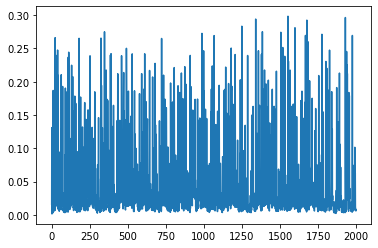

Mean Square Error is  0.3398809661648309 

Mean Absolute Error is  0.5001722851038247 

Correlation Coefficient is  [-0.00540376] 

For Least Angle Regression with Batch Gradient Descent. 



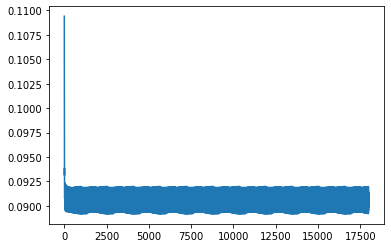

Mean Square Error is  0.3166716264372025 

Mean Absolute Error is  0.5000074250282667 

Correlation Coefficient is  [-0.01288154] 

For Least Angle Regression with Mini Batch Gradient Descent. 



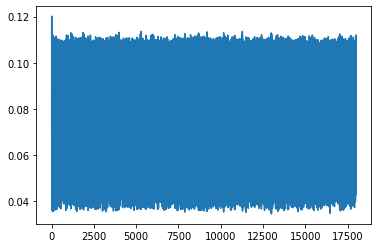

Mean Square Error is  0.3199898689352237 

Mean Absolute Error is  0.5000538738731918 

Correlation Coefficient is  [-0.00497415] 

For Least Angle Regression with Stochastic Gradient Descent. 



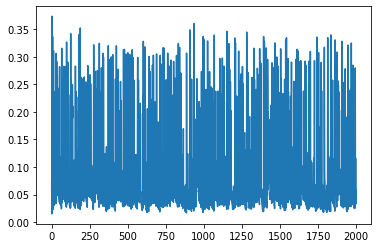

Mean Square Error is  0.3312282183925973 

Mean Absolute Error is  0.5001422752557184 

Correlation Coefficient is  [-0.00792598] 

For alpha value  0.1 , lambda value  0.5 ,  10000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Linear Regression with Batch Gradient Descent. 



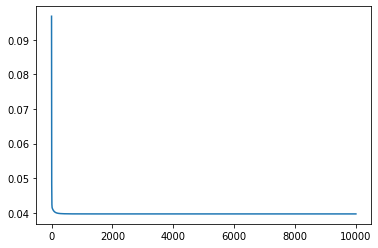

Mean Square Error is  0.2624152611977102 

Mean Absolute Error is  0.49926004135303065 

Correlation Coefficient is  [0.03755827] 

For Linear Regression with Mini Batch Gradient Descent. 



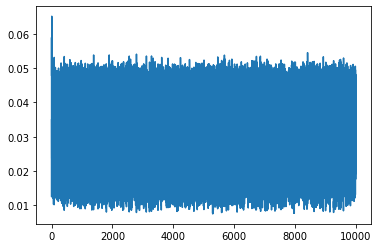

Mean Square Error is  0.279993336801973 

Mean Absolute Error is  0.49963502148601896 

Correlation Coefficient is  [0.02249713] 

For Linear Regression with Stochastic Gradient Descent. 



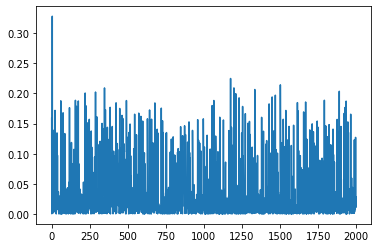

Mean Square Error is  0.26399360053845 

Mean Absolute Error is  0.4991051159017809 

Correlation Coefficient is  [0.28869514] 

For Ridge Regression with Batch Gradient Descent. 



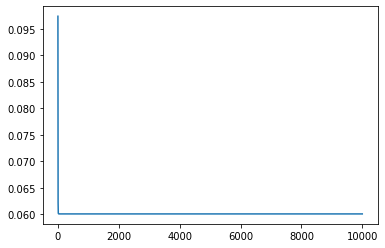

Mean Square Error is  0.2976868193195775 

Mean Absolute Error is  0.5004920795472381 

Correlation Coefficient is  [-0.00768691] 

For Ridge Regression with Mini Batch Gradient Descent. 



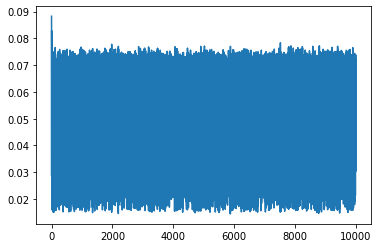

Mean Square Error is  0.30411444148118183 

Mean Absolute Error is  0.5004831261642312 

Correlation Coefficient is  [-0.00771859] 

For Ridge Regression with Stochastic Gradient Descent. 



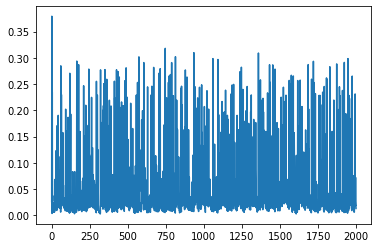

Mean Square Error is  0.3029785454083795 

Mean Absolute Error is  0.5005601031927047 

Correlation Coefficient is  [-0.00828432] 

For Least Angle Regression with Batch Gradient Descent. 



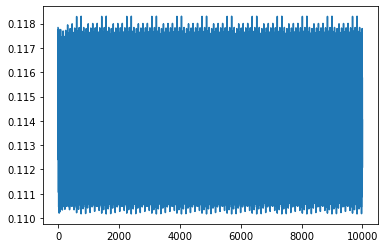

Mean Square Error is  0.36994187912994925 

Mean Absolute Error is  0.500220969518832 

Correlation Coefficient is  [-0.01576105] 

For Least Angle Regression with Mini Batch Gradient Descent. 



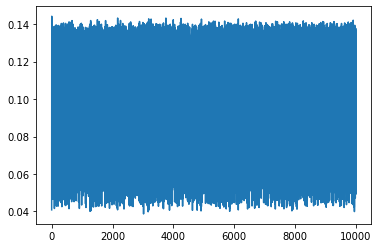

Mean Square Error is  0.4099746152628718 

Mean Absolute Error is  0.5000997481565075 

Correlation Coefficient is  [-0.0121433] 

For Least Angle Regression with Stochastic Gradient Descent. 



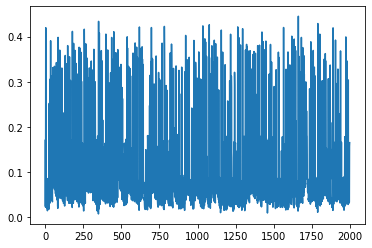

Mean Square Error is  0.357868885922776 

Mean Absolute Error is  0.5001363082629118 

Correlation Coefficient is  [-0.0065415] 

For alpha value  0.1 , lambda value  0.5 ,  12000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Linear Regression with Batch Gradient Descent. 



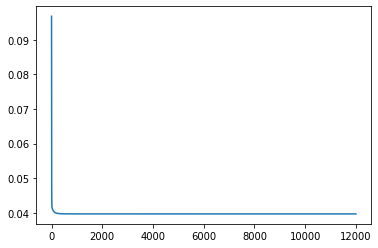

Mean Square Error is  0.2624152611977985 

Mean Absolute Error is  0.49926004135300106 

Correlation Coefficient is  [0.03755827] 

For Linear Regression with Mini Batch Gradient Descent. 



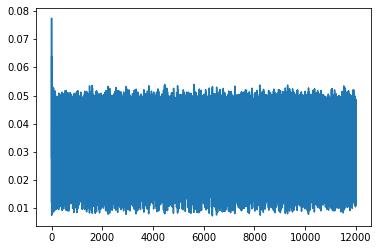

Mean Square Error is  0.27348544202943914 

Mean Absolute Error is  0.49964599425344797 

Correlation Coefficient is  [0.01771544] 

For Linear Regression with Stochastic Gradient Descent. 



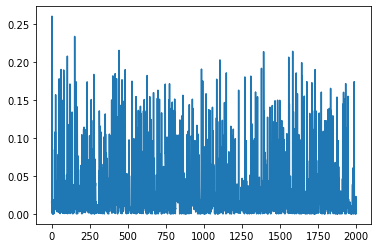

Mean Square Error is  0.3340813744415116 

Mean Absolute Error is  0.4983336771848462 

Correlation Coefficient is  [0.03443534] 

For Ridge Regression with Batch Gradient Descent. 



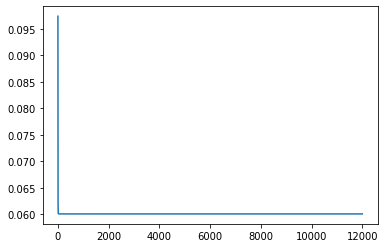

Mean Square Error is  0.2976868193195775 

Mean Absolute Error is  0.5004920795472381 

Correlation Coefficient is  [-0.00768691] 

For Ridge Regression with Mini Batch Gradient Descent. 



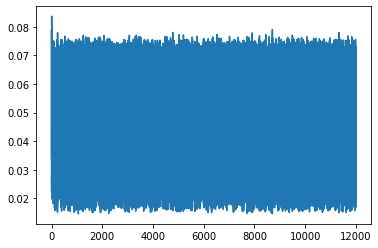

Mean Square Error is  0.3123058328183105 

Mean Absolute Error is  0.5004481241699728 

Correlation Coefficient is  [-0.00770042] 

For Ridge Regression with Stochastic Gradient Descent. 



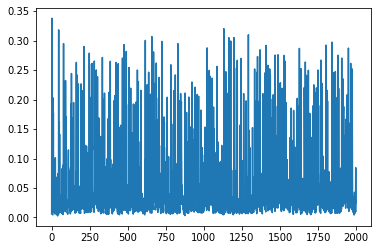

Mean Square Error is  0.31881324533266453 

Mean Absolute Error is  0.50034659287569 

Correlation Coefficient is  [-0.00699604] 

For Least Angle Regression with Batch Gradient Descent. 



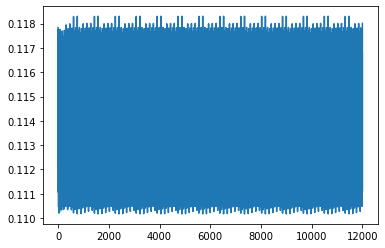

Mean Square Error is  0.3575528925070842 

Mean Absolute Error is  0.5002271128993734 

Correlation Coefficient is  [-0.00858037] 

For Least Angle Regression with Mini Batch Gradient Descent. 



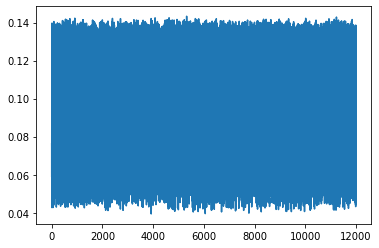

Mean Square Error is  0.399836757497851 

Mean Absolute Error is  0.5001929851874938 

Correlation Coefficient is  [-0.00968646] 

For Least Angle Regression with Stochastic Gradient Descent. 



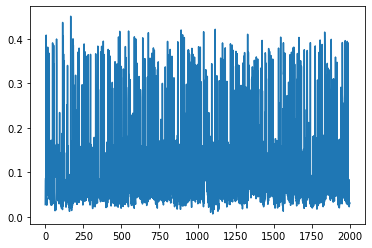

Mean Square Error is  0.4549093104695001 

Mean Absolute Error is  0.5001413970057721 

Correlation Coefficient is  [-0.00992499] 

For alpha value  0.1 , lambda value  0.5 ,  18000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Linear Regression with Batch Gradient Descent. 



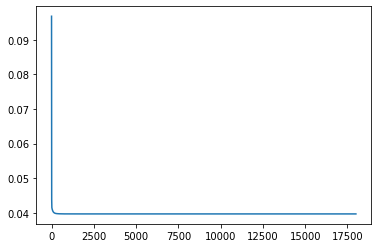

Mean Square Error is  0.2624152611977991 

Mean Absolute Error is  0.4992600413530008 

Correlation Coefficient is  [0.03755827] 

For Linear Regression with Mini Batch Gradient Descent. 



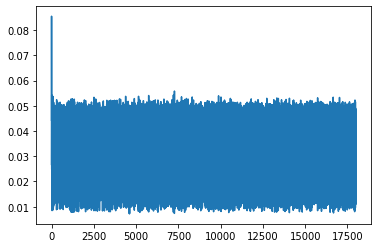

Mean Square Error is  0.27824473953063944 

Mean Absolute Error is  0.4996301520990582 

Correlation Coefficient is  [0.01949678] 

For Linear Regression with Stochastic Gradient Descent. 



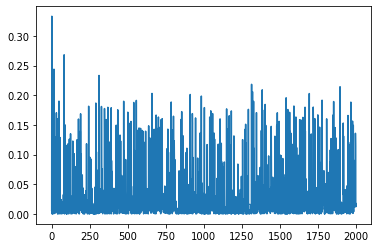

Mean Square Error is  0.25847684383853636 

Mean Absolute Error is  0.49985992606285523 

Correlation Coefficient is  [0.00193887] 

For Ridge Regression with Batch Gradient Descent. 



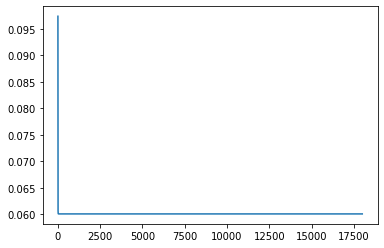

Mean Square Error is  0.2976868193195775 

Mean Absolute Error is  0.5004920795472381 

Correlation Coefficient is  [-0.00768691] 

For Ridge Regression with Mini Batch Gradient Descent. 



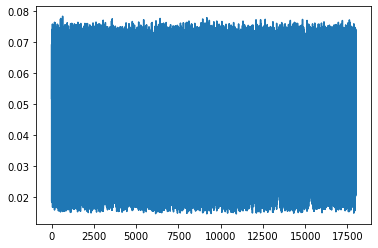

Mean Square Error is  0.30572803584402825 

Mean Absolute Error is  0.5004682721335917 

Correlation Coefficient is  [-0.00766462] 

For Ridge Regression with Stochastic Gradient Descent. 



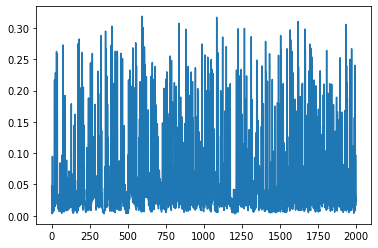

Mean Square Error is  0.3011223283748067 

Mean Absolute Error is  0.5003733088568902 

Correlation Coefficient is  [-0.00675573] 

For Least Angle Regression with Batch Gradient Descent. 



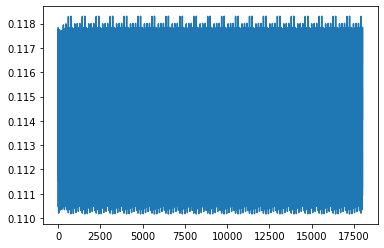

Mean Square Error is  0.35808782034520903 

Mean Absolute Error is  0.5002261639954478 

Correlation Coefficient is  [-0.00870388] 

For Least Angle Regression with Mini Batch Gradient Descent. 



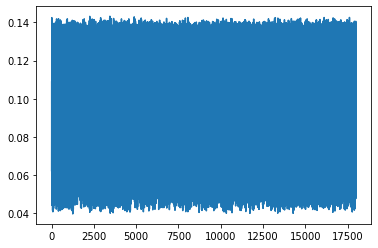

Mean Square Error is  0.39647573121288787 

Mean Absolute Error is  0.5000306924798197 

Correlation Coefficient is  [-0.02767268] 

For Least Angle Regression with Stochastic Gradient Descent. 



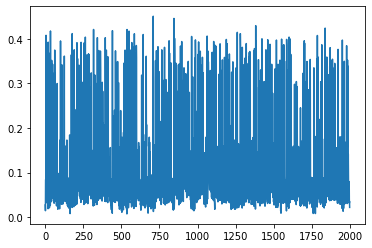

Mean Square Error is  0.4374491401268724 

Mean Absolute Error is  0.500049956663624 

Correlation Coefficient is  [-0.00615818] 

For alpha value  0.1 , lambda value  0.01 ,  10000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Linear Regression with Batch Gradient Descent. 



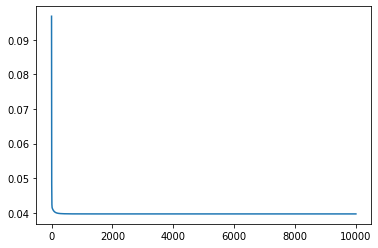

Mean Square Error is  0.2624152611977102 

Mean Absolute Error is  0.49926004135303065 

Correlation Coefficient is  [0.03755827] 

For Linear Regression with Mini Batch Gradient Descent. 



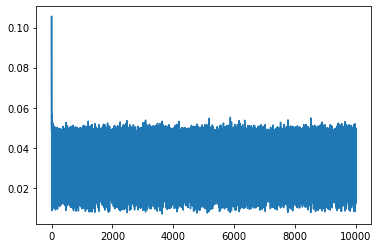

Mean Square Error is  0.26745427677967887 

Mean Absolute Error is  0.4996910650996124 

Correlation Coefficient is  [0.0116777] 

For Linear Regression with Stochastic Gradient Descent. 



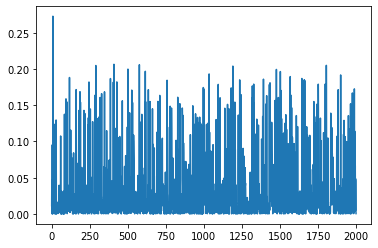

Mean Square Error is  0.26461016289108635 

Mean Absolute Error is  0.49943626829033916 

Correlation Coefficient is  [0.01916595] 

For Ridge Regression with Batch Gradient Descent. 



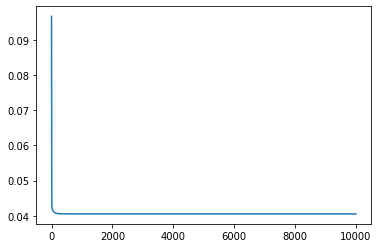

Mean Square Error is  0.2633319590542924 

Mean Absolute Error is  0.4995541800475226 

Correlation Coefficient is  [0.01679067] 

For Ridge Regression with Mini Batch Gradient Descent. 



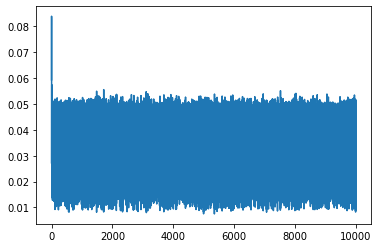

Mean Square Error is  0.2739230422029682 

Mean Absolute Error is  0.49985296286126235 

Correlation Coefficient is  [0.00490117] 

For Ridge Regression with Stochastic Gradient Descent. 



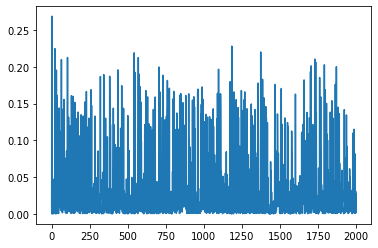

Mean Square Error is  0.270346040430559 

Mean Absolute Error is  0.5003495888400064 

Correlation Coefficient is  [-0.00335769] 

For Least Angle Regression with Batch Gradient Descent. 



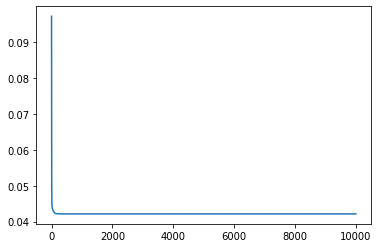

Mean Square Error is  0.26213398885935263 

Mean Absolute Error is  0.4999990567776944 

Correlation Coefficient is  [5.01136935e-05] 

For Least Angle Regression with Mini Batch Gradient Descent. 



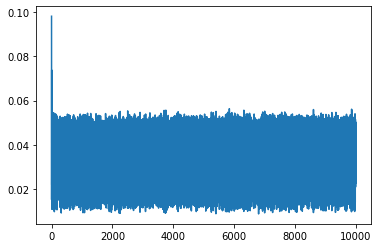

Mean Square Error is  0.26498226991095 

Mean Absolute Error is  0.5000723270408975 

Correlation Coefficient is  [-0.0037452] 

For Least Angle Regression with Stochastic Gradient Descent. 



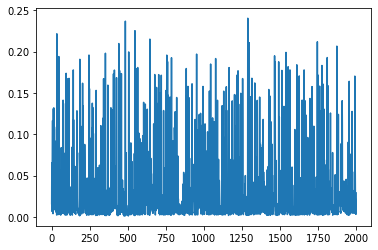

Mean Square Error is  0.2765686390656189 

Mean Absolute Error is  0.5000888305234584 

Correlation Coefficient is  [-0.00220585] 

For alpha value  0.1 , lambda value  0.01 ,  12000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Linear Regression with Batch Gradient Descent. 



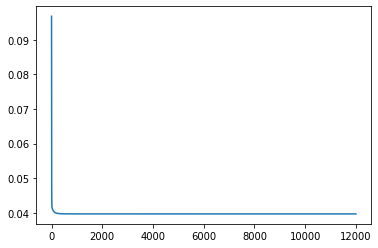

Mean Square Error is  0.2624152611977985 

Mean Absolute Error is  0.49926004135300106 

Correlation Coefficient is  [0.03755827] 

For Linear Regression with Mini Batch Gradient Descent. 



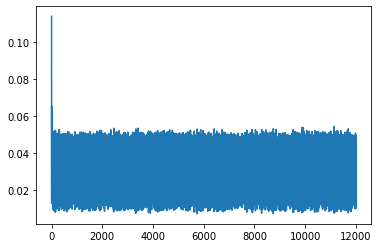

Mean Square Error is  0.27010103504573574 

Mean Absolute Error is  0.499689709936435 

Correlation Coefficient is  [0.01189047] 

For Linear Regression with Stochastic Gradient Descent. 



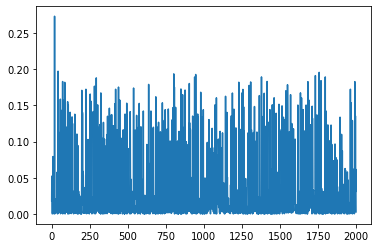

Mean Square Error is  0.2894114390413473 

Mean Absolute Error is  0.4996417150741463 

Correlation Coefficient is  [0.00867365] 

For Ridge Regression with Batch Gradient Descent. 



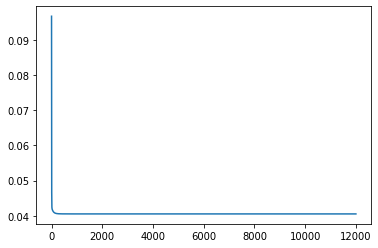

Mean Square Error is  0.2633319590542924 

Mean Absolute Error is  0.4995541800475226 

Correlation Coefficient is  [0.01679067] 

For Ridge Regression with Mini Batch Gradient Descent. 



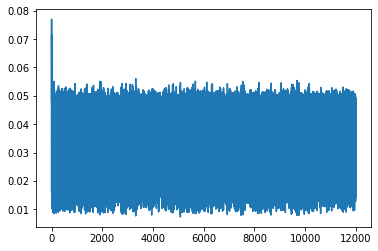

Mean Square Error is  0.2798618935881557 

Mean Absolute Error is  0.49977488376090945 

Correlation Coefficient is  [0.01064072] 

For Ridge Regression with Stochastic Gradient Descent. 



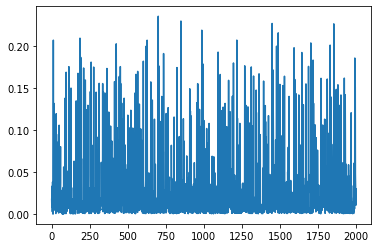

Mean Square Error is  0.26521108284474193 

Mean Absolute Error is  0.49963608798482023 

Correlation Coefficient is  [0.00905562] 

For Least Angle Regression with Batch Gradient Descent. 



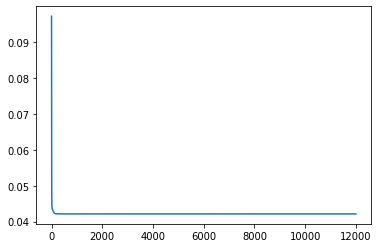

Mean Square Error is  0.26217908830847203 

Mean Absolute Error is  0.49999662600674294 

Correlation Coefficient is  [0.00018062] 

For Least Angle Regression with Mini Batch Gradient Descent. 



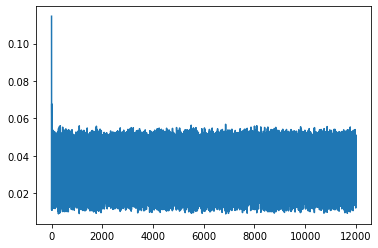

Mean Square Error is  0.27857324291327323 

Mean Absolute Error is  0.4999751934493088 

Correlation Coefficient is  [0.00444396] 

For Least Angle Regression with Stochastic Gradient Descent. 



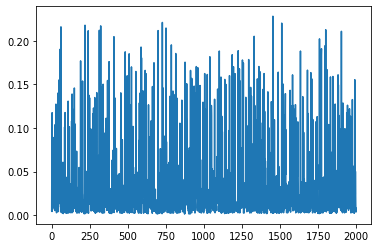

Mean Square Error is  0.2846179950088379 

Mean Absolute Error is  0.4996983298598061 

Correlation Coefficient is  [0.04551617] 

For alpha value  0.1 , lambda value  0.01 ,  18000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Linear Regression with Batch Gradient Descent. 



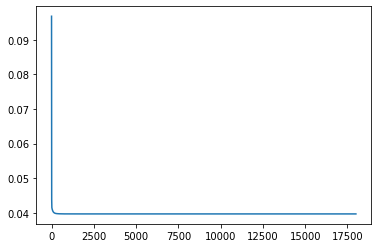

Mean Square Error is  0.2624152611977991 

Mean Absolute Error is  0.4992600413530008 

Correlation Coefficient is  [0.03755827] 

For Linear Regression with Mini Batch Gradient Descent. 



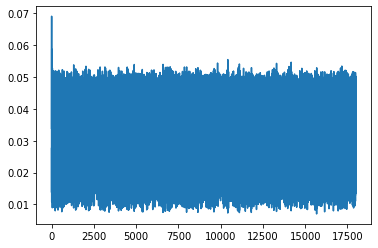

Mean Square Error is  0.2752609358261887 

Mean Absolute Error is  0.49965185749364693 

Correlation Coefficient is  [0.01803686] 

For Linear Regression with Stochastic Gradient Descent. 



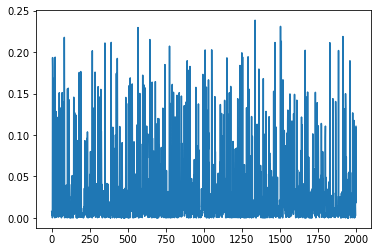

Mean Square Error is  0.2523491874467024 

Mean Absolute Error is  0.4997141581154807 

Correlation Coefficient is  [0.00566817] 

For Ridge Regression with Batch Gradient Descent. 



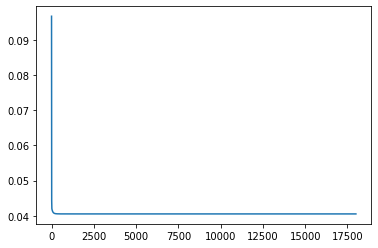

Mean Square Error is  0.2633319590542924 

Mean Absolute Error is  0.4995541800475226 

Correlation Coefficient is  [0.01679067] 

For Ridge Regression with Mini Batch Gradient Descent. 



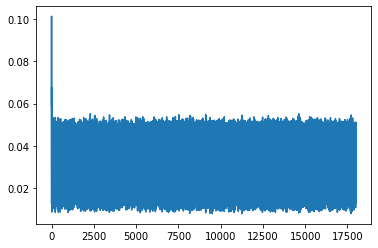

Mean Square Error is  0.28007880775849836 

Mean Absolute Error is  0.499771806955851 

Correlation Coefficient is  [0.01036689] 

For Ridge Regression with Stochastic Gradient Descent. 



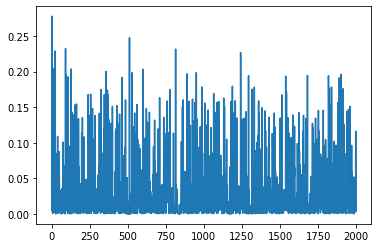

Mean Square Error is  0.2772831904403139 

Mean Absolute Error is  0.4997387364659371 

Correlation Coefficient is  [0.00625989] 

For Least Angle Regression with Batch Gradient Descent. 



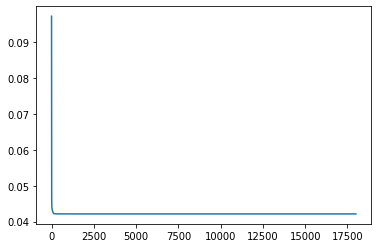

Mean Square Error is  0.26217816936942623 

Mean Absolute Error is  0.49999628097439863 

Correlation Coefficient is  [0.00019923] 

For Least Angle Regression with Mini Batch Gradient Descent. 



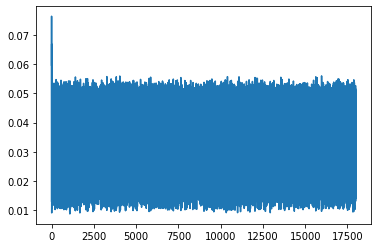

Mean Square Error is  0.2743480358942066 

Mean Absolute Error is  0.49996806873184035 

Correlation Coefficient is  [0.00348771] 

For Least Angle Regression with Stochastic Gradient Descent. 



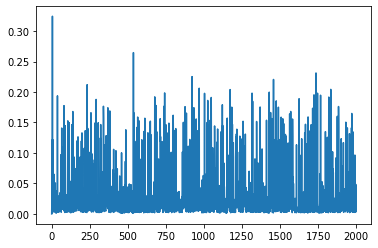

Mean Square Error is  0.25666576676274067 

Mean Absolute Error is  0.5004388551863623 

Correlation Coefficient is  [-0.00648052] 

For alpha value  0.05 , lambda value  0.3 ,  10000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Linear Regression with Batch Gradient Descent. 



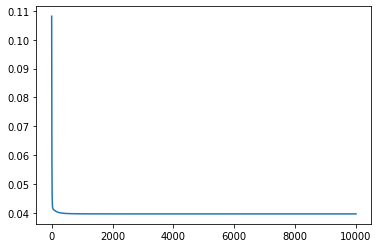

Mean Square Error is  0.26241524785897113 

Mean Absolute Error is  0.49926004582856853 

Correlation Coefficient is  [0.03755813] 

For Linear Regression with Mini Batch Gradient Descent. 



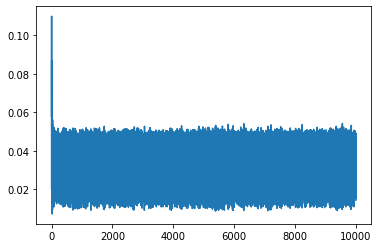

Mean Square Error is  0.26882269629967287 

Mean Absolute Error is  0.49969796989936655 

Correlation Coefficient is  [0.0118083] 

For Linear Regression with Stochastic Gradient Descent. 



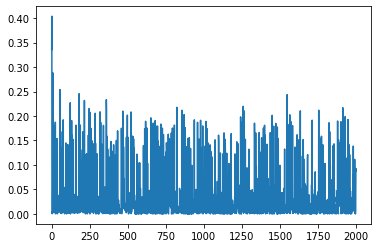

Mean Square Error is  0.25397576337381855 

Mean Absolute Error is  0.49947537763788796 

Correlation Coefficient is  [0.0114027] 

For Ridge Regression with Batch Gradient Descent. 



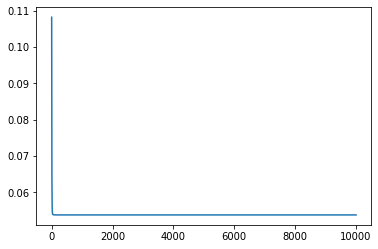

Mean Square Error is  0.2860217011791117 

Mean Absolute Error is  0.5004735118928201 

Correlation Coefficient is  [-0.00719954] 

For Ridge Regression with Mini Batch Gradient Descent. 



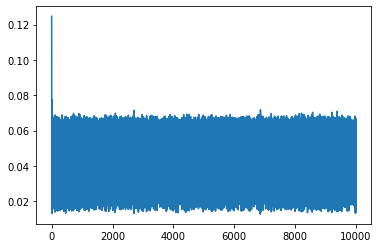

Mean Square Error is  0.30115555136662453 

Mean Absolute Error is  0.5004299251595091 

Correlation Coefficient is  [-0.00724902] 

For Ridge Regression with Stochastic Gradient Descent. 



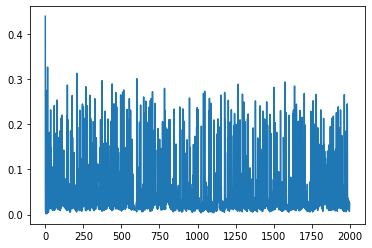

Mean Square Error is  0.31022573565201567 

Mean Absolute Error is  0.5004500860765236 

Correlation Coefficient is  [-0.00770632] 

For Least Angle Regression with Batch Gradient Descent. 



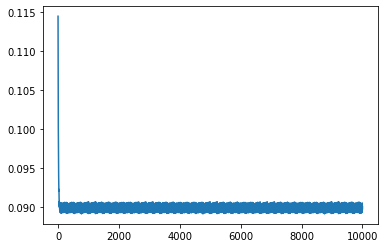

Mean Square Error is  0.31152999424079175 

Mean Absolute Error is  0.5000120346529212 

Correlation Coefficient is  [-0.0029618] 

For Least Angle Regression with Mini Batch Gradient Descent. 



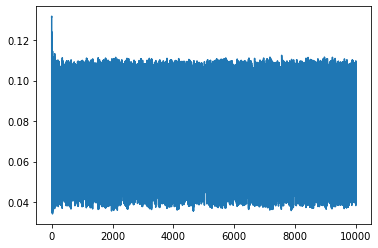

Mean Square Error is  0.336382522832634 

Mean Absolute Error is  0.49997353647942155 

Correlation Coefficient is  [0.01012759] 

For Least Angle Regression with Stochastic Gradient Descent. 



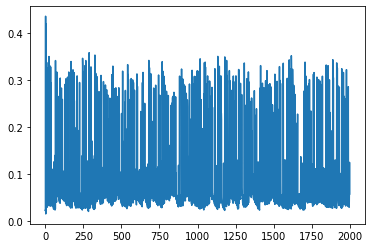

Mean Square Error is  0.3324131943900243 

Mean Absolute Error is  0.4999922734623081 

Correlation Coefficient is  [0.00156389] 

For alpha value  0.05 , lambda value  0.3 ,  12000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Linear Regression with Batch Gradient Descent. 



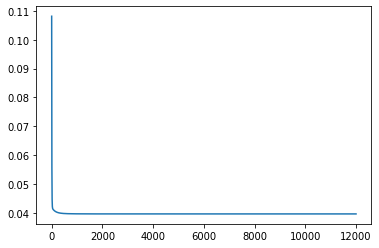

Mean Square Error is  0.2624152599638724 

Mean Absolute Error is  0.4992600417670192 

Correlation Coefficient is  [0.03755825] 

For Linear Regression with Mini Batch Gradient Descent. 



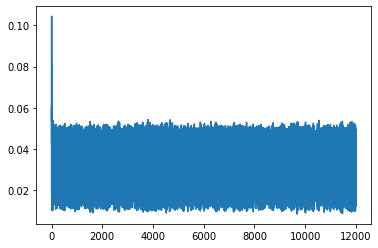

Mean Square Error is  0.2752979122493415 

Mean Absolute Error is  0.49966107021694295 

Correlation Coefficient is  [0.01562786] 

For Linear Regression with Stochastic Gradient Descent. 



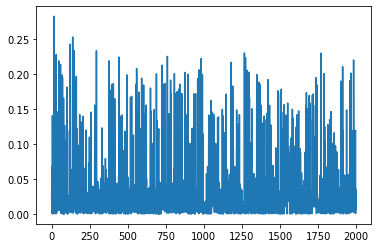

Mean Square Error is  0.2831690011206581 

Mean Absolute Error is  0.49980114880708354 

Correlation Coefficient is  [0.0064692] 

For Ridge Regression with Batch Gradient Descent. 



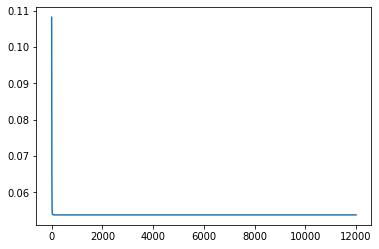

Mean Square Error is  0.2860217011791117 

Mean Absolute Error is  0.5004735118928201 

Correlation Coefficient is  [-0.00719954] 

For Ridge Regression with Mini Batch Gradient Descent. 



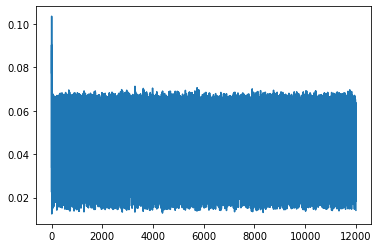

Mean Square Error is  0.3106796246246344 

Mean Absolute Error is  0.500376201926458 

Correlation Coefficient is  [-0.00714949] 

For Ridge Regression with Stochastic Gradient Descent. 



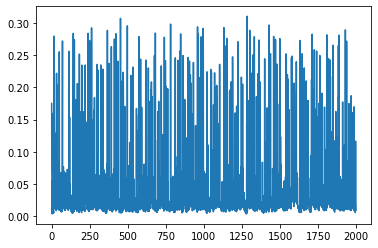

Mean Square Error is  0.2973947306498903 

Mean Absolute Error is  0.5005448828046655 

Correlation Coefficient is  [-0.00752567] 

For Least Angle Regression with Batch Gradient Descent. 



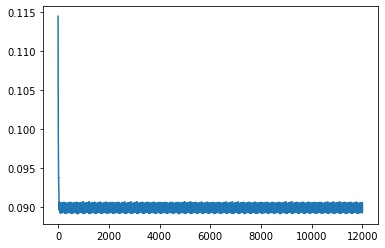

Mean Square Error is  0.31239720053889697 

Mean Absolute Error is  0.5000207676154254 

Correlation Coefficient is  [-0.00610723] 

For Least Angle Regression with Mini Batch Gradient Descent. 



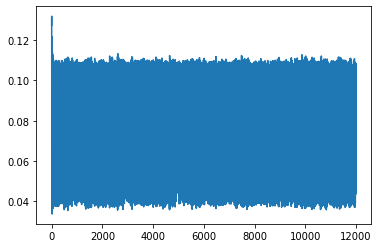

Mean Square Error is  0.3312114571689429 

Mean Absolute Error is  0.500041793979576 

Correlation Coefficient is  [-0.02366909] 

For Least Angle Regression with Stochastic Gradient Descent. 



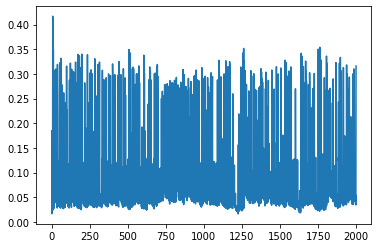

Mean Square Error is  0.3098273286495292 

Mean Absolute Error is  0.49996011697309345 

Correlation Coefficient is  [0.07430156] 

For alpha value  0.05 , lambda value  0.3 ,  18000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Linear Regression with Batch Gradient Descent. 



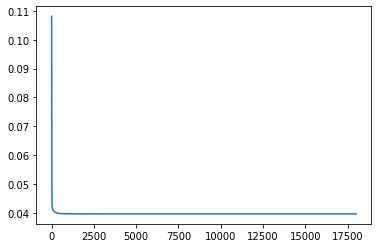

Mean Square Error is  0.2624152611968225 

Mean Absolute Error is  0.4992600413533285 

Correlation Coefficient is  [0.03755827] 

For Linear Regression with Mini Batch Gradient Descent. 



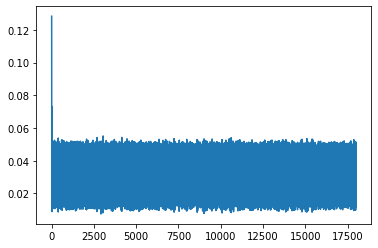

Mean Square Error is  0.2755894875598908 

Mean Absolute Error is  0.4996758912544218 

Correlation Coefficient is  [0.01516843] 

For Linear Regression with Stochastic Gradient Descent. 



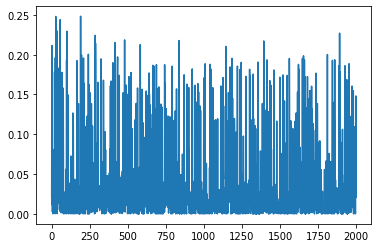

Mean Square Error is  0.2566789044349787 

Mean Absolute Error is  0.49985158917866723 

Correlation Coefficient is  [0.00222202] 

For Ridge Regression with Batch Gradient Descent. 



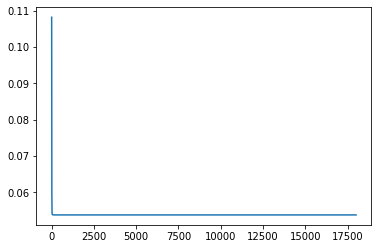

Mean Square Error is  0.2860217011791117 

Mean Absolute Error is  0.5004735118928201 

Correlation Coefficient is  [-0.00719954] 

For Ridge Regression with Mini Batch Gradient Descent. 



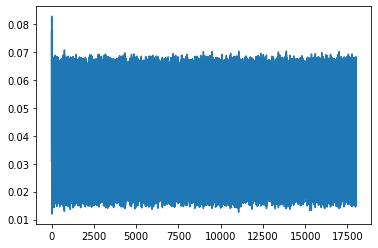

Mean Square Error is  0.30092377442411183 

Mean Absolute Error is  0.5004325589041818 

Correlation Coefficient is  [-0.00726985] 

For Ridge Regression with Stochastic Gradient Descent. 



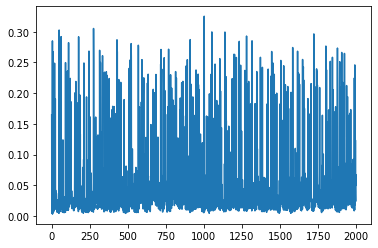

Mean Square Error is  0.2882400160892279 

Mean Absolute Error is  0.5005953274924316 

Correlation Coefficient is  [-0.00751556] 

For Least Angle Regression with Batch Gradient Descent. 



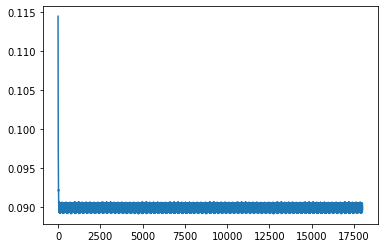

Mean Square Error is  0.31217225054866815 

Mean Absolute Error is  0.5000617908144632 

Correlation Coefficient is  [-0.02008945] 

For Least Angle Regression with Mini Batch Gradient Descent. 



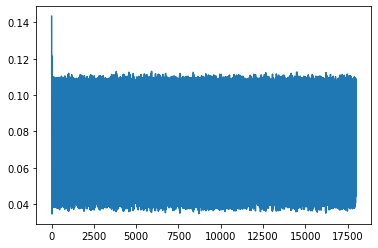

Mean Square Error is  0.3345377814504463 

Mean Absolute Error is  0.5000184033501835 

Correlation Coefficient is  [-0.00842125] 

For Least Angle Regression with Stochastic Gradient Descent. 



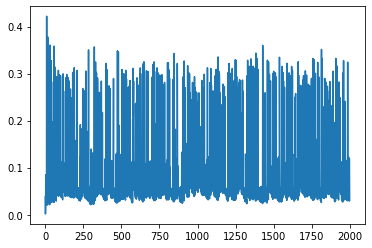

Mean Square Error is  0.34174902687109443 

Mean Absolute Error is  0.5000457791664474 

Correlation Coefficient is  [-0.01004649] 

For alpha value  0.05 , lambda value  0.5 ,  10000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Linear Regression with Batch Gradient Descent. 



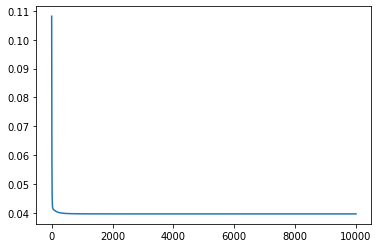

Mean Square Error is  0.26241524785897113 

Mean Absolute Error is  0.49926004582856853 

Correlation Coefficient is  [0.03755813] 

For Linear Regression with Mini Batch Gradient Descent. 



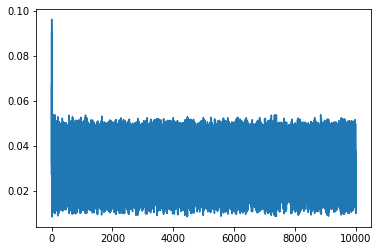

Mean Square Error is  0.28117536078955235 

Mean Absolute Error is  0.4996055979482882 

Correlation Coefficient is  [0.02520339] 

For Linear Regression with Stochastic Gradient Descent. 



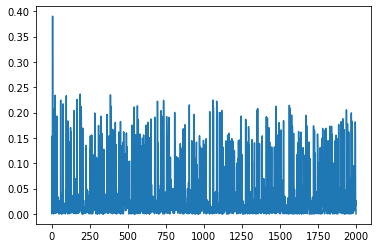

Mean Square Error is  0.2570666546252574 

Mean Absolute Error is  0.4992250383147655 

Correlation Coefficient is  [0.03748755] 

For Ridge Regression with Batch Gradient Descent. 



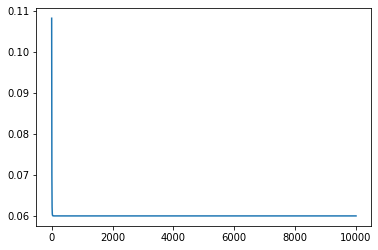

Mean Square Error is  0.2976868193195775 

Mean Absolute Error is  0.5004920795472382 

Correlation Coefficient is  [-0.00768691] 

For Ridge Regression with Mini Batch Gradient Descent. 



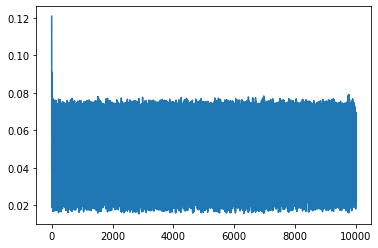

Mean Square Error is  0.3182544714582689 

Mean Absolute Error is  0.5004190548977477 

Correlation Coefficient is  [-0.00764892] 

For Ridge Regression with Stochastic Gradient Descent. 



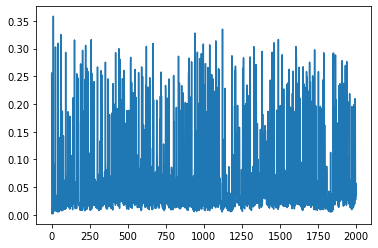

Mean Square Error is  0.28474659931025953 

Mean Absolute Error is  0.5006160584425914 

Correlation Coefficient is  [-0.00774563] 

For Least Angle Regression with Batch Gradient Descent. 



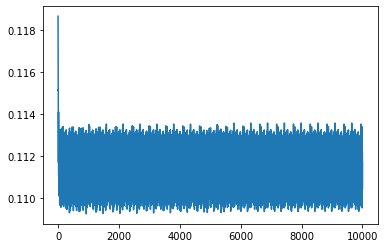

Mean Square Error is  0.37792226918435967 

Mean Absolute Error is  0.4999619416292524 

Correlation Coefficient is  [0.06894425] 

For Least Angle Regression with Mini Batch Gradient Descent. 



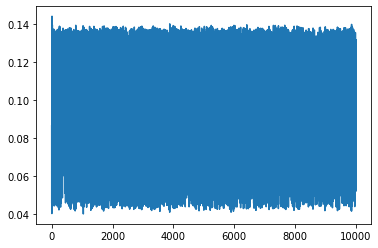

Mean Square Error is  0.382371294969542 

Mean Absolute Error is  0.5000684542504107 

Correlation Coefficient is  [-0.00812224] 

For Least Angle Regression with Stochastic Gradient Descent. 



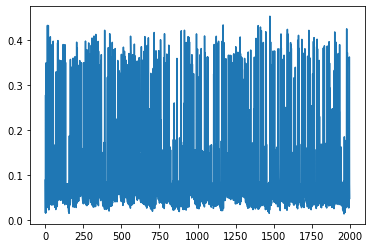

Mean Square Error is  0.37611949694962765 

Mean Absolute Error is  0.5001529331699535 

Correlation Coefficient is  [-0.0071367] 

For alpha value  0.05 , lambda value  0.5 ,  12000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Linear Regression with Batch Gradient Descent. 



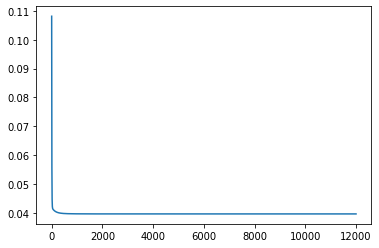

Mean Square Error is  0.2624152599638724 

Mean Absolute Error is  0.4992600417670192 

Correlation Coefficient is  [0.03755825] 

For Linear Regression with Mini Batch Gradient Descent. 



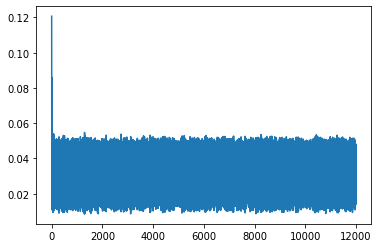

Mean Square Error is  0.2674110097967593 

Mean Absolute Error is  0.499706602913322 

Correlation Coefficient is  [0.01087153] 

For Linear Regression with Stochastic Gradient Descent. 



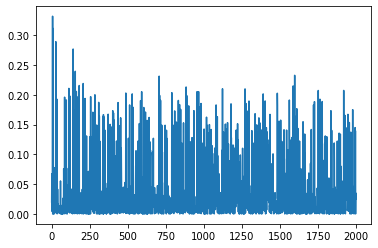

Mean Square Error is  0.2640317227504511 

Mean Absolute Error is  0.49958152929653676 

Correlation Coefficient is  [0.00826898] 

For Ridge Regression with Batch Gradient Descent. 



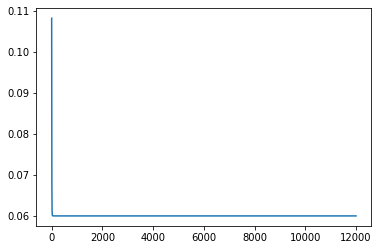

Mean Square Error is  0.2976868193195775 

Mean Absolute Error is  0.5004920795472382 

Correlation Coefficient is  [-0.00768691] 

For Ridge Regression with Mini Batch Gradient Descent. 



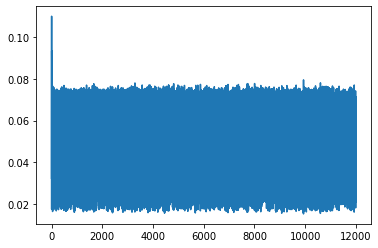

Mean Square Error is  0.3157991615311198 

Mean Absolute Error is  0.5004333100649692 

Correlation Coefficient is  [-0.00766323] 

For Ridge Regression with Stochastic Gradient Descent. 



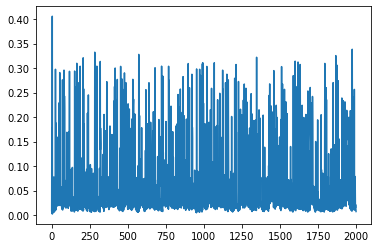

Mean Square Error is  0.3372250409013531 

Mean Absolute Error is  0.5003254562051749 

Correlation Coefficient is  [-0.00735461] 

For Least Angle Regression with Batch Gradient Descent. 



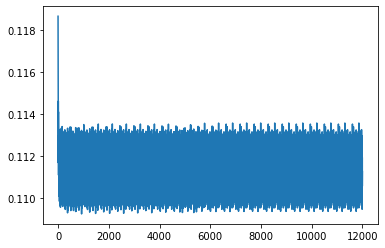

Mean Square Error is  0.37515170048549423 

Mean Absolute Error is  0.50005159258792 

Correlation Coefficient is  [-0.0277421] 

For Least Angle Regression with Mini Batch Gradient Descent. 



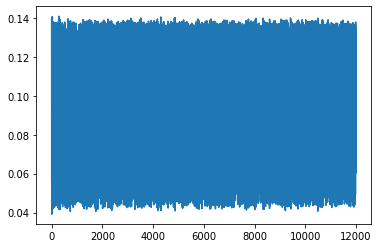

Mean Square Error is  0.3899689723871834 

Mean Absolute Error is  0.5001056549528907 

Correlation Coefficient is  [-0.01484339] 

For Least Angle Regression with Stochastic Gradient Descent. 



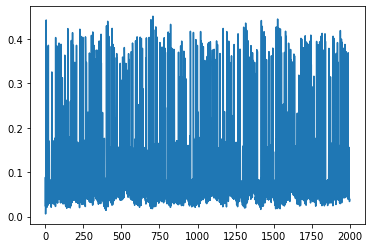

Mean Square Error is  0.402077594781475 

Mean Absolute Error is  0.4999285270529774 

Correlation Coefficient is  [0.0139451] 

For alpha value  0.05 , lambda value  0.5 ,  18000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Linear Regression with Batch Gradient Descent. 



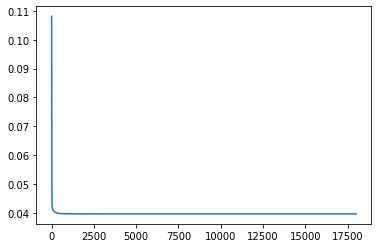

Mean Square Error is  0.2624152611968225 

Mean Absolute Error is  0.4992600413533285 

Correlation Coefficient is  [0.03755827] 

For Linear Regression with Mini Batch Gradient Descent. 



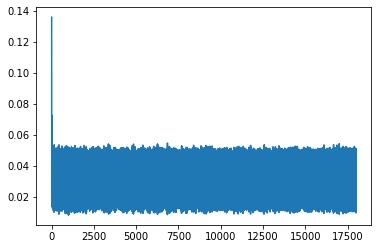

Mean Square Error is  0.27947069750688913 

Mean Absolute Error is  0.4996373556497993 

Correlation Coefficient is  [0.01880928] 

For Linear Regression with Stochastic Gradient Descent. 



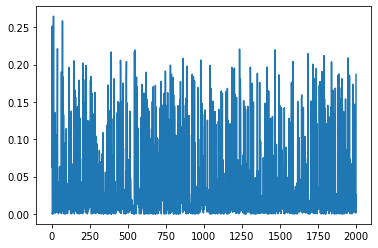

Mean Square Error is  0.25912642748259573 

Mean Absolute Error is  0.49968899180563486 

Correlation Coefficient is  [0.00652504] 

For Ridge Regression with Batch Gradient Descent. 



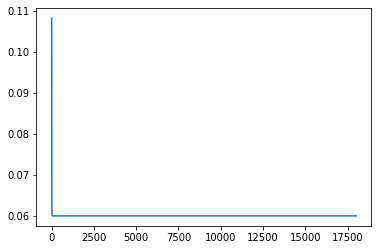

Mean Square Error is  0.2976868193195775 

Mean Absolute Error is  0.5004920795472382 

Correlation Coefficient is  [-0.00768691] 

For Ridge Regression with Mini Batch Gradient Descent. 



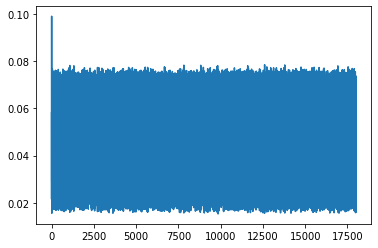

Mean Square Error is  0.31776972617002225 

Mean Absolute Error is  0.5004184505630204 

Correlation Coefficient is  [-0.00763653] 

For Ridge Regression with Stochastic Gradient Descent. 



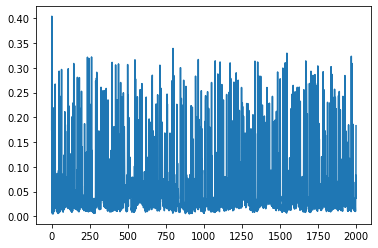

Mean Square Error is  0.2943526879577935 

Mean Absolute Error is  0.5004672860797834 

Correlation Coefficient is  [-0.00719836] 

For Least Angle Regression with Batch Gradient Descent. 



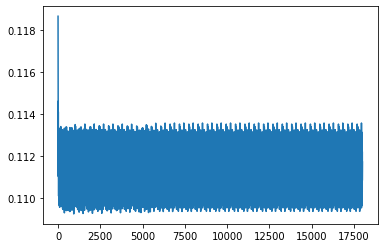

Mean Square Error is  0.37407867504816317 

Mean Absolute Error is  0.49997944309078746 

Correlation Coefficient is  [0.00568874] 

For Least Angle Regression with Mini Batch Gradient Descent. 



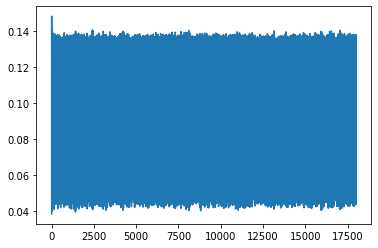

Mean Square Error is  0.39676937365852105 

Mean Absolute Error is  0.5000873869124096 

Correlation Coefficient is  [-0.00714648] 

For Least Angle Regression with Stochastic Gradient Descent. 



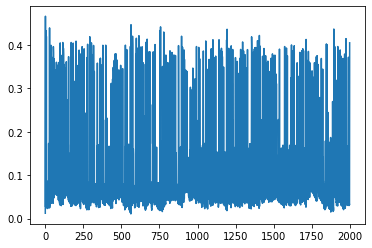

Mean Square Error is  0.374441816324893 

Mean Absolute Error is  0.5002233423731829 

Correlation Coefficient is  [-0.01136145] 

For alpha value  0.05 , lambda value  0.01 ,  10000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Linear Regression with Batch Gradient Descent. 



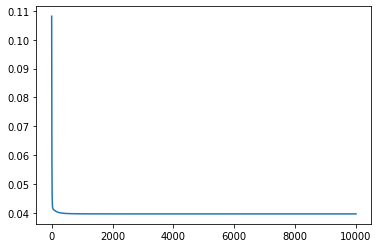

Mean Square Error is  0.26241524785897113 

Mean Absolute Error is  0.49926004582856853 

Correlation Coefficient is  [0.03755813] 

For Linear Regression with Mini Batch Gradient Descent. 



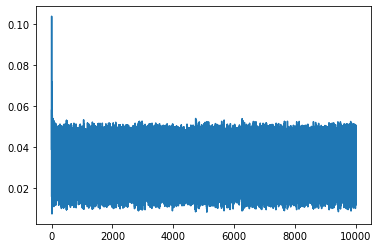

Mean Square Error is  0.26983701796392207 

Mean Absolute Error is  0.49969931546658763 

Correlation Coefficient is  [0.0110842] 

For Linear Regression with Stochastic Gradient Descent. 



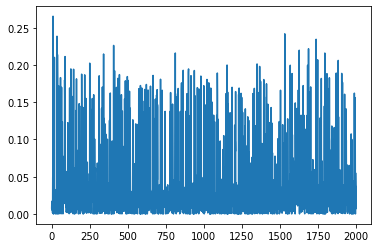

Mean Square Error is  0.2640574014907028 

Mean Absolute Error is  0.5001240622269818 

Correlation Coefficient is  [-0.00135707] 

For Ridge Regression with Batch Gradient Descent. 



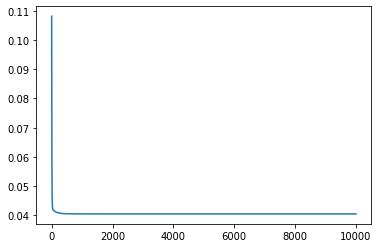

Mean Square Error is  0.26333195898740547 

Mean Absolute Error is  0.4995541800686018 

Correlation Coefficient is  [0.01679067] 

For Ridge Regression with Mini Batch Gradient Descent. 



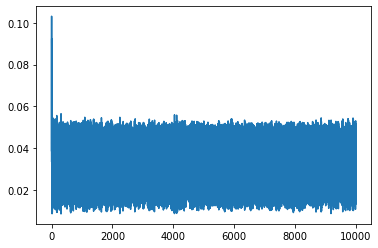

Mean Square Error is  0.27828271731640764 

Mean Absolute Error is  0.4998057415440087 

Correlation Coefficient is  [0.00771538] 

For Ridge Regression with Stochastic Gradient Descent. 



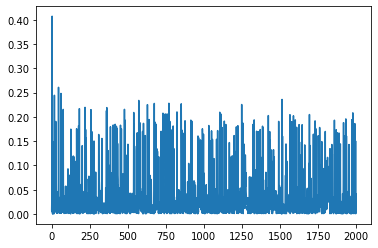

Mean Square Error is  0.26539254795623407 

Mean Absolute Error is  0.4997027871167551 

Correlation Coefficient is  [0.00701608] 

For Least Angle Regression with Batch Gradient Descent. 



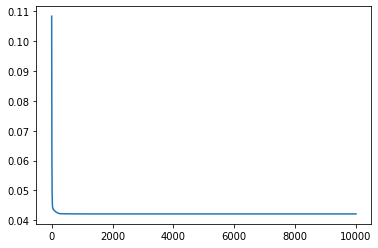

Mean Square Error is  0.26214827702642785 

Mean Absolute Error is  0.49999897786043973 

Correlation Coefficient is  [5.43849271e-05] 

For Least Angle Regression with Mini Batch Gradient Descent. 



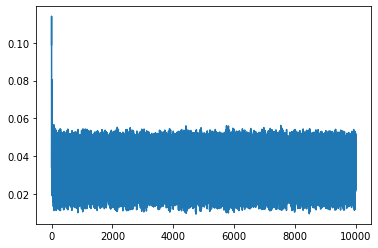

Mean Square Error is  0.26362564419682355 

Mean Absolute Error is  0.5000894959024281 

Correlation Coefficient is  [-0.00415546] 

For Least Angle Regression with Stochastic Gradient Descent. 



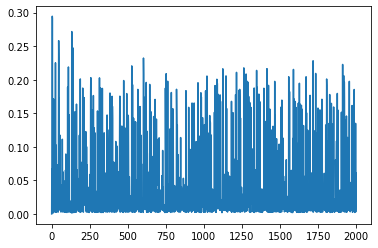

Mean Square Error is  0.25950967857585117 

Mean Absolute Error is  0.5002006150655846 

Correlation Coefficient is  [-0.00411395] 

For alpha value  0.05 , lambda value  0.01 ,  12000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Linear Regression with Batch Gradient Descent. 



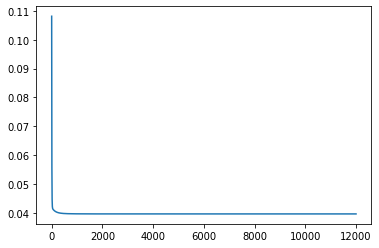

Mean Square Error is  0.2624152599638724 

Mean Absolute Error is  0.4992600417670192 

Correlation Coefficient is  [0.03755825] 

For Linear Regression with Mini Batch Gradient Descent. 



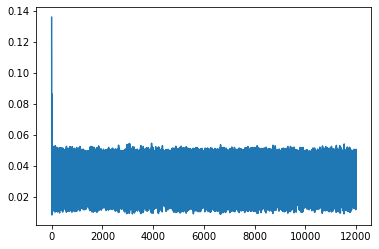

Mean Square Error is  0.2768864639179246 

Mean Absolute Error is  0.49964933278773493 

Correlation Coefficient is  [0.0187249] 

For Linear Regression with Stochastic Gradient Descent. 



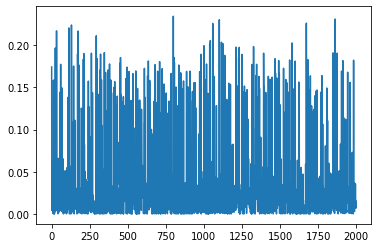

Mean Square Error is  0.2867011371942096 

Mean Absolute Error is  0.4996576009644137 

Correlation Coefficient is  [0.00900072] 

For Ridge Regression with Batch Gradient Descent. 



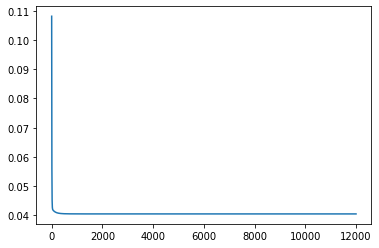

Mean Square Error is  0.2633319590520196 

Mean Absolute Error is  0.4995541800482389 

Correlation Coefficient is  [0.01679067] 

For Ridge Regression with Mini Batch Gradient Descent. 



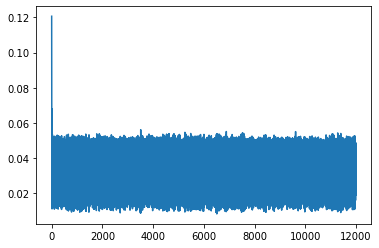

Mean Square Error is  0.2768337212631615 

Mean Absolute Error is  0.49981456562779336 

Correlation Coefficient is  [0.00731752] 

For Ridge Regression with Stochastic Gradient Descent. 



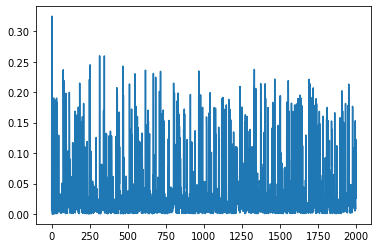

Mean Square Error is  0.2603469660572946 

Mean Absolute Error is  0.49991139149169667 

Correlation Coefficient is  [0.00156375] 

For Least Angle Regression with Batch Gradient Descent. 



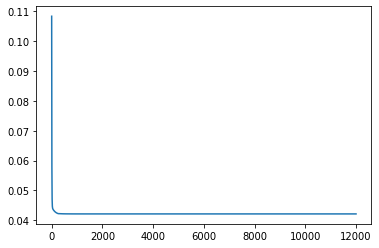

Mean Square Error is  0.26214407255083294 

Mean Absolute Error is  0.49999921293701294 

Correlation Coefficient is  [4.18469276e-05] 

For Least Angle Regression with Mini Batch Gradient Descent. 



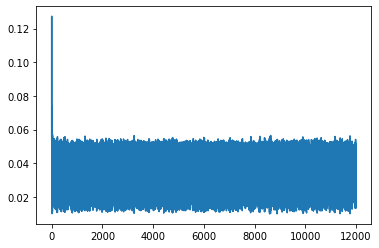

Mean Square Error is  0.27128172079750823 

Mean Absolute Error is  0.5000281086636742 

Correlation Coefficient is  [-0.00201023] 

For Least Angle Regression with Stochastic Gradient Descent. 



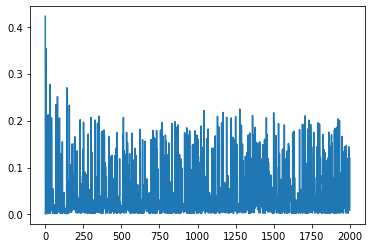

Mean Square Error is  0.25160244474839155 

Mean Absolute Error is  0.5000603221200318 

Correlation Coefficient is  [-0.00157665] 

For alpha value  0.05 , lambda value  0.01 ,  18000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Linear Regression with Batch Gradient Descent. 



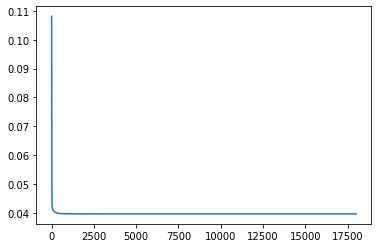

Mean Square Error is  0.2624152611968225 

Mean Absolute Error is  0.4992600413533285 

Correlation Coefficient is  [0.03755827] 

For Linear Regression with Mini Batch Gradient Descent. 



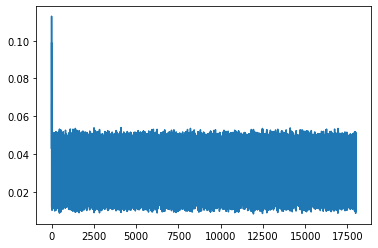

Mean Square Error is  0.2725325521013192 

Mean Absolute Error is  0.4996806230363591 

Correlation Coefficient is  [0.01361652] 

For Linear Regression with Stochastic Gradient Descent. 



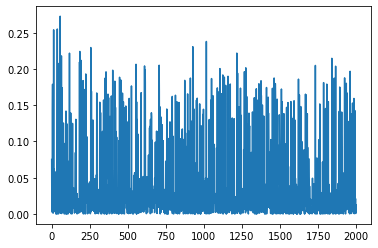

Mean Square Error is  0.2724901945519577 

Mean Absolute Error is  0.49934217045345514 

Correlation Coefficient is  [0.02435907] 

For Ridge Regression with Batch Gradient Descent. 



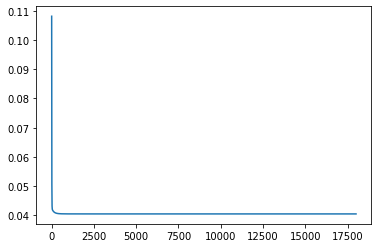

Mean Square Error is  0.2633319590542921 

Mean Absolute Error is  0.4995541800475226 

Correlation Coefficient is  [0.01679067] 

For Ridge Regression with Mini Batch Gradient Descent. 



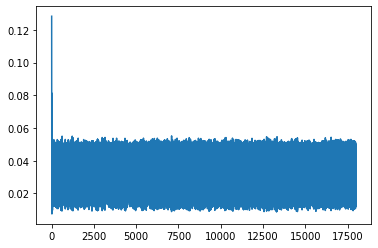

Mean Square Error is  0.2707299030364744 

Mean Absolute Error is  0.4998475913053725 

Correlation Coefficient is  [0.00501714] 

For Ridge Regression with Stochastic Gradient Descent. 



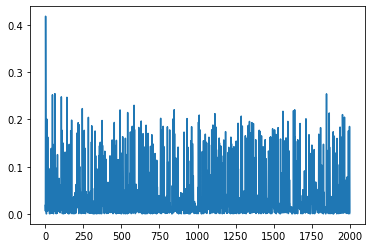

Mean Square Error is  0.2577472567910086 

Mean Absolute Error is  0.49995103935626456 

Correlation Coefficient is  [0.00078415] 

For Least Angle Regression with Batch Gradient Descent. 



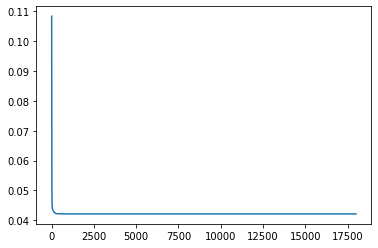

Mean Square Error is  0.2621320145068725 

Mean Absolute Error is  0.49999990733069816 

Correlation Coefficient is  [4.91669959e-06] 

For Least Angle Regression with Mini Batch Gradient Descent. 



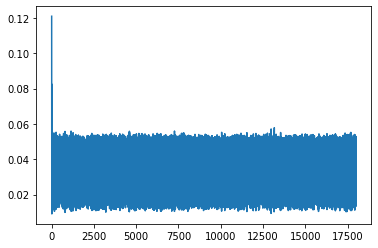

Mean Square Error is  0.27229615217728104 

Mean Absolute Error is  0.5000098299417159 

Correlation Coefficient is  [-0.00076144] 

For Least Angle Regression with Stochastic Gradient Descent. 



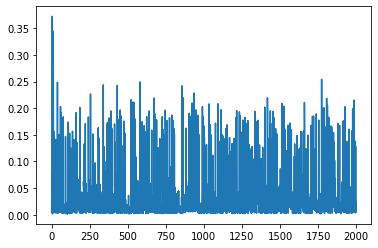

Mean Square Error is  0.2644054053455599 

Mean Absolute Error is  0.5001301647037633 

Correlation Coefficient is  [-0.00415506] 



In [43]:
batch_size = 40
n_epochs = 2000

for i in range (0,3):
  alpha = alphaoptions[i]
  for k in range(0,3):
    lamb = lamboptions[k]
    for l in range (0,3):
      iters = iterationsoptions[l]
      print("For alpha value ",alpha,", lambda value ",lamb,", ",iters," iterations, ",n_epochs," epochs and/or ",batch_size," batch size we get the following error and correlation values.\n")
      print("For Linear Regression with Batch Gradient Descent. \n")
      LR_BGD(alpha,iters)
      
      print("For Linear Regression with Mini Batch Gradient Descent. \n")
      LR_MBGD(alpha,iters,batch_size)
      print("For Linear Regression with Stochastic Gradient Descent. \n")
      LR_SGD(alpha,n_epochs)
      print("For Ridge Regression with Batch Gradient Descent. \n")
      RR_BGD(alpha,iters,lamb)
      print("For Ridge Regression with Mini Batch Gradient Descent. \n")
      RR_MBGD(alpha,iters,batch_size,lamb)
      print("For Ridge Regression with Stochastic Gradient Descent. \n")
      RR_SGD(alpha,n_epochs,lamb)
      print("For Least Angle Regression with Batch Gradient Descent. \n")
      LAR_BGD(alpha,iters,lamb)
      print("For Least Angle Regression with Mini Batch Gradient Descent. \n")
      LAR_MBGD(alpha,iters,batch_size,lamb)
      print("For Least Angle Regression with Stochastic Gradient Descent. \n")
      LAR_SGD(alpha,n_epochs,lamb)




  
